In [1]:
#!/usr/bin/env python
# coding: utf-8

In[143]:

In [2]:
import pandas as pd
import matplotlib.pylab as pl
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import csv
import pathlib
import os
from cycler import cycler

get_ipython().run_line_magic('matplotlib', 'inline')

In[144]:

In [3]:
import matplotlib.style
import seaborn as sns
#to see all the plot default plot style
# s available and then you can choose the one you want in the line below
matplotlib.style.use('seaborn-v0_8-white')
#plt.style.available

# Function Defenition

## Data Wrangling Functions

## Read Power Data Func Def

%%  Defining resource dictionary and color schemes

In [4]:
resource_dict = {'C_biomass' : 'Biomass', 
                 'C_conventional_hydroelectric' : 'Hydro', 
             'C_conventional_steam_coal' : 'Coal',
              'C_natural_gas_fired_combined_cycle' : 'Gas',
              'C_natural_gas_fired_combustion_turbine' : 'Gas',
              'C_natural_gas_steam_turbine' : 'Gas',
               'C_nuclear' :'Nuclear',
                'C_solar_photovoltaic' : 'Solar',
                'C_solar_photovoltaic_1': 'Solar_PPA',
                'C_onshore_wind_turbine_1' : 'Wind_PPA',
                'C_Solar_PPA': 'Solar_PPA',
                'C_Wind_PPA': 'Wind_PPA',
                'biomass' : 'Biomass', 
                'conventional_hydroelectric' : 'Hydro', 
                'small_hydroelectric' : 'Hydro', 
                'conventional_steam_coal' : 'Coal',
                'natural_gas_fired_combined_cycle' : 'Gas',
                'natural_gas_fired_combustion_turbine' : 'Gas',
                'natural_gas_steam_turbine' : 'Gas',
                'nuclear' :'Nuclear',
                'solar_photovoltaic' : 'Solar',
                'solar_photovoltaic_exp' : 'Solar',
                'solar_photovoltaic_ppa': 'Solar_PPA',
                'onshore_wind_turbine' : 'Wind',   
                'onshore_wind_turbine_exp' : 'Wind',   
                'onshore_wind_turbine_ppa': 'Wind_PPA',
                 'Battery_ppa': 'Battery_PPA',
                'Battery_exp': 'Battery',
                'Battery': 'Battery'}

Color codes:

Gas - blue<br>
Nuclear - mint<br>
Coal - orange<br>
Wind - Green<br>
Solar - Yellow<br>
list of global colors for each generator type

In [5]:
    
def getColorbyGenType (TechnologyList):
    # create variable with dummy values
    color = sns.color_palette("Set1",n_colors=len(TechnologyList))
    for i in range(len(TechnologyList)):
        if TechnologyList[i] =='Coal':
            color[i] = 'black'
        elif TechnologyList[i] =='Gas':
            color[i] = 'darkviolet'
        elif TechnologyList[i] =='Hydro':
            color[i] = 'dodgerblue'
        elif TechnologyList[i] =='Biomass':
            color[i] = 'springgreen'
        elif TechnologyList[i] =='Battery':
             color[i] = 'brown'
        elif TechnologyList[i] =='Battery_PPA':
                  color[i] = 'peru'
        elif TechnologyList[i] =='Wind':
            color[i] = 'limegreen'
        elif TechnologyList[i] =='Wind_PPA':
            color[i] = 'green'
        elif TechnologyList[i] =='Solar_PPA':
             color[i] = 'orange'
        elif TechnologyList[i] =='Solar':
             color[i] = 'gold'
        elif TechnologyList[i] =='Nuclear':
                    color[i] = 'pink'
    return color
   

In[81]:

et all scenarios in a directory

In [6]:
def get_scenario_names(sen_name):
    lst = os.listdir()
    lst = list(filter(lambda k: sen_name in k, lst))
    lst = list(filter(lambda k: '.jl' not in k, lst))
    lst = list(filter(lambda k: '.sh' not in k, lst))
    lst = list(filter(lambda k: '.csv' not in k, lst))
    lst = list(filter(lambda k: 'DACNon' not in k, lst))
    lst = list(filter(lambda k: 'Baseline' not in k, lst))
    
    return lst    
    
    
def read_cost_data(dir_list, scenario_name_dict):
    
    costs_df = pd.DataFrame(columns=["scenario_name", "total_cost", "Power", "H2", "CO2", "SynFuels"])
    detailed_costs_df = pd.DataFrame(columns=["scenario_name", "Elec_Fixed", "Elec_Var", "Elec_Startup", "Elec_Network",
                        "H2_Gen_Fixed","H2_G2P_Fixed","H2_Storage_Fixed","H2_Var",
                        #"H2_Gen_Fixed", "H2_Liquid_Fixed","H2_G2P_Fixed","H2_Storage_Fixed","H2_Var", "H2_G2P_Var", "H2_Network","H2_Truck_Fixed", "H2_Truck_OPEX", 
                        "H2_VarElec"])
    for dir_name in dir_list:
        total_cost = pd.read_csv(dir_name + "/Results/status.csv").iloc[0]["Objval"]#.drop([0])
        power_cost = pd.read_csv(dir_name + "/Results/costs.csv").iloc[0]["Total"] * 1e-9
        power_detail = pd.read_csv(dir_name + "/Results/costs.csv").loc[[1,2,4,6], ["Costs","Total"]]
        
        h2_cost = 0
        h2_elec_cost = [0]
        h2_detail = pd.DataFrame(columns=["Total"], data=np.zeros(9))
        if os.path.exists(dir_name + "/Results/Results_HSC/"):
            h2_cost = pd.read_csv(dir_name + "/Results/Results_HSC/HSC_costs.csv").iloc[0]["Total"] * 1e-9
            h2_detail = pd.read_csv(dir_name + "/Results/Results_HSC/HSC_costs.csv").loc[[1,2,3,5], ["Costs","Total"]]
            # FIX THE COST FACTOR AFTER CODE IS FIXED
            h2_elec_cost = pd.read_csv(dir_name + "/Results/Results_HSC/HSC_elec_costs.csv").sum(axis=1).tolist()

        #dac_cost= pd.read_csv("./" + dir_name + "/Results/Results_CSC/CSC_DAC_total_costs.csv").iloc[0]["Total"]
        #co2_comp_cost = pd.read_csv("./" + dir_name + "/Results/Results_CSC/CSC_co2_capture_compression_total_cost.csv").iloc[0]["Total"]
        #co2_stor_cost = pd.read_csv("./" + dir_name + "/Results/Results_CSC/CSC_co2_storage_injection_total_cost.csv").iloc[0]["Total"]
        #co2_pipe_cost = sum(pd.read_csv("./" + dir_name + "/Results/Results_CSC/CSC_co2_pipeline_expansion.csv")["Fixed_Cost_Pipes"])
        
        #csc_cost = (dac_cost+ co2_comp_cost + co2_stor_cost + co2_pipe_cost) * 1e-9
        
        synfuel_cost = 0
        csc_cost = 0
        
        if os.path.exists(dir_name + "/Results/Results_SynFuels/"):
        
            synfuel_cost = pd.read_csv(dir_name + "/Results/Results_SynFuels/SynFuel_costs.csv").iloc[0]["Total"] * 1e-9
        
        
        curr_costs_df = pd.DataFrame(index = [scenario_name_dict[dir_name]], columns=["scenario_name", "total_cost", "Power", "H2", "CO2", "SynFuels"], data=[[scenario_name_dict[dir_name],total_cost, power_cost, h2_cost, csc_cost, synfuel_cost]])
        #print(curr_costs_df)
        costs_df = pd.concat([costs_df, curr_costs_df])
        
        data=[scenario_name_dict[dir_name]]
        data.extend((power_detail['Total']*1e-9).tolist())
        data.extend((h2_detail['Total']*1e-9).tolist())
        data.extend([h2_elec_cost[0]*1e-6])  
        
        curr_detail_df = pd.DataFrame(index = [scenario_name_dict[dir_name]], columns=["scenario_name", 
            "Elec_Fixed", "Elec_Var", "Elec_Startup", "Elec_Network",
            "H2_Gen_Fixed","H2_G2P_Fixed","H2_Storage_Fixed","H2_Var",
            "H2_VarElec"], 
                data=[data])
        detailed_costs_df = pd.concat([detailed_costs_df, curr_detail_df])
    return costs_df, detailed_costs_df

In[82]:

In [7]:
def read_power_data(dir_list, bat, scenario_name_dict):
    
    power_cap_list = []
    power_gen_list = []
    power_battery_cap_list = []
    comb_power_capacity_list = []
    
    for dir_name in dir_list:
                #Raw Data
        power_df = pd.read_csv("./" + dir_name + "/Results/power.csv").drop([0,1])
        weights_df = pd.read_csv("./" + dir_name + "/Results/time_weights.csv")
        capacity_df = pd.read_csv("./" + dir_name + "/Results/capacity.csv")

        #THIS WILL NEED TO BE UPDATED
        ##All new dolphyn runs have the capacity.csv file transposed so this will be necessary for all.
        if 'Rep' in dir_name:
            capacity_df.loc["Resource"] = capacity_df.columns
            capacity_df = capacity_df.T
            capacity_df.columns = capacity_df.iloc[0]
            capacity_df = capacity_df.drop(capacity_df.index[0])

        #########Power###########

        #Wrangle Power Data into long format
        power_long_df = power_df.melt(id_vars = "Resource").query("Resource != 'Zone' & Resource != 'AnnualSum'")
        power_long_df = power_long_df.assign(variable = power_long_df["variable"].str.strip().str.replace('solar_photovoltaic_ppa', 'Solar_PPA'))
        power_long_df = power_long_df.assign(variable = power_long_df["variable"].str.strip().str.replace('onshore_wind_turbine_ppa', 'Wind_PPA'))
        power_long_df = power_long_df.assign(variable = power_long_df["variable"].str.strip().str.replace('Battery_ppa', 'Battery_PPA'))
       # power_long_df['resource_type'] = power_long_df['Resource'].str.replace('_\d+$', '', regex=True)
        #print(power_long_df['resource_type'])
        #power_long_df['resource_type'] = power_long_df['resource_type'].replace(resource_dict.keys(), resource_dict.values())

       ##WORKS BUT DOES NOT AGGREGATE ALL RESOURCE TYPES
        power_long_df = power_long_df.assign(zone = power_long_df["variable"].str[:6].str.strip(),
                                resource_type = power_long_df["variable"].str.replace('_\d+$', '', regex=True),
                                interval = pd.to_numeric(power_long_df["Resource"].str[1:]) ).replace({"resource_type": resource_dict})
                
        zones = power_long_df["zone"].unique()
        power_total_df = power_long_df.query("zone == 'Total'")
        #Add weights to long power data frame
        power_long_df = power_long_df.merge(weights_df, left_on = "interval", right_on = "Time", how = "left")

        #Aggregate power data by zone
        power_zone_df = power_long_df.groupby(['zone','interval']).agg({'value': 'sum'}).query("zone != 'Total'").reset_index()
        power_gen_df = power_long_df.query("variable != 'Total'").groupby(['resource_type','interval']).agg({'value': 'sum'}).reset_index()

        #Aggregate power by generator type
        power_gen_total_df = power_long_df.query("variable != 'Total'").assign(gen = power_long_df["value"] * power_long_df["Weight"]).groupby(['resource_type']).agg({'gen': 'sum'}).reset_index()
        power_gen_total_df = power_gen_total_df.assign(generation_twh = power_gen_total_df["gen"] * 0.000001, scenario = scenario_name_dict[dir_name])
        
        if 'no_H2' in dir_name:
            power_gen_total_df = pd.concat([power_gen_total_df, (pd.DataFrame(['Solar_PPA', 0, 0, scenario_name_dict[dir_name]], 
                                                index=['resource_type', 'gen', 'generation_twh', 'scenario']).T)],
                                                ignore_index=True)
            power_gen_total_df = pd.concat([power_gen_total_df, (pd.DataFrame(['Wind_PPA', 0, 0, scenario_name_dict[dir_name]], 
                                                index=['resource_type', 'gen', 'generation_twh', 'scenario']).T)],
                                                ignore_index=True)
            if bat == True:
                power_gen_total_df = pd.concat([power_gen_total_df, (pd.DataFrame(['Battery_PPA', 0, 0, scenario_name_dict[dir_name]], 
                                                index=['resource_type', 'gen', 'generation_twh', 'scenario']).T)],
                                                ignore_index=True)
            
        
        power_gen_list.append(power_gen_total_df)
        
    ######Generator Capacity##########

        #Aggregate capacity total capacity
        capacity_df = capacity_df.assign(Resource = capacity_df["Resource"].str.strip().str.replace('solar_photovoltaic_ppa', 'Solar_PPA'))
        capacity_df = capacity_df.assign(Resource = capacity_df["Resource"].str.strip().str.replace('onshore_wind_turbine_ppa', 'Wind_PPA'))
        capacity_df = capacity_df.assign(Resource = capacity_df["Resource"].str.strip().str.replace('Battery_ppa', 'Battery_PPA'))
        capacity_df['resource_type'] = capacity_df['Resource'].str.replace('_\d+$', '', regex=True)
        capacity_df['resource_type'] = capacity_df['resource_type'].replace(resource_dict.keys(), resource_dict.values())
        
        #end_capacity_scenario_df = capacity_df.query("Resource != 'Total'").assign(zone = capacity_df["Resource"].str[:6].str.strip(),
        #            resource_type = capacity_df["Resource"].str.replace('_\d+$', '', regex=True))

        if 'base_no_expansion' in dir_name:
            end_capacity_scenario_df = capacity_df.query("Resource != 'Total'").assign(zone = capacity_df["Resource"].str[:6].str.strip()).replace({"resource_type": resource_dict}).groupby(['resource_type']).agg({'StartCap': 'sum'}).assign(scenario = scenario_name_dict[dir_name])
            end_capacity_scenario_df["EndCap"] = end_capacity_scenario_df["StartCap"]
        else:
            end_capacity_scenario_df = capacity_df.query("Resource != 'Total'").assign(zone = capacity_df["Resource"].str[:6].str.strip()).replace({"resource_type": resource_dict}).groupby(['resource_type']).agg({'EndCap': 'sum'}).assign(scenario = scenario_name_dict[dir_name])

        #end_capacity_scenario_df['resource_type'] = end_capacity_scenario_df['resource_type'].replace(resource_dict)
        #end_capacity_scenario_df['scenario'] = scenario_name_dict[dir_name]
        
        
       # end_capacity_scenario_df = end_capacity_scenario_df['resource_type'].replace({"resource_type": resource_dict}).groupby(['resource_type'])
        #.replace({"resource_type": resource_dict}).groupby(['resource_type']).agg({'EndCap': 'sum'}).assign(scenario = scenario_name_dict[dir_name])
        end_capacity_scenario_df = end_capacity_scenario_df.assign(capacity_gw = end_capacity_scenario_df["EndCap"] * 0.001).reset_index()
        
       # print(end_capacity_scenario_df)
        #print(dir_name)
        #temp = end_capacity_scenario_df.query("resource_type != 'battery' & resource_type != 'PHS'")
        #print(temp.sum())
                
        if 'no_H2' in dir_name:
            end_capacity_scenario_df = pd.concat([end_capacity_scenario_df, (pd.DataFrame(['Solar_PPA', 0, scenario_name_dict[dir_name], 0], 
                                                index=['resource_type', 'EndCap', 'scenario', 'capacity_gw']).T)],
                                                ignore_index=True)
            end_capacity_scenario_df = pd.concat([end_capacity_scenario_df, (pd.DataFrame(['Wind_PPA', 0, scenario_name_dict[dir_name], 0], 
                                                index=['resource_type', 'EndCap', 'scenario', 'capacity_gw']).T)],
                                                ignore_index=True)
            
            if bat == True:
                end_capacity_scenario_df = pd.concat([end_capacity_scenario_df, (pd.DataFrame(['Battery_PPA', 0, scenario_name_dict[dir_name], 0], 
                                                index=['resource_type', 'EndCap', 'scenario', 'capacity_gw']).T)],
                                                ignore_index=True)
        
        power_cap_list.append(end_capacity_scenario_df)

        ######Battery Capacity###########
        end_battery_capacity_scenario_df = capacity_df.query("Resource != 'Total'").assign(zone = capacity_df["Resource"].str[:6].str.strip(),
                       resource_type = capacity_df["Resource"].str.strip().str.replace('\_\d+', '')).replace({"resource_type": resource_dict}).groupby(['resource_type']).agg({'EndEnergyCap': 'sum'}).assign(scenario = scenario_name_dict[dir_name])
        end_battery_capacity_scenario_df = end_battery_capacity_scenario_df.assign(capacity_gwh = end_battery_capacity_scenario_df["EndEnergyCap"] * 0.001).reset_index()
        power_battery_cap_list.append(end_battery_capacity_scenario_df)
        
        ######Comp Power and Capacity DF#####
        
        comb_power_capacity_df = pd.merge(power_gen_total_df, end_capacity_scenario_df, on = ['resource_type', 'scenario'])
        #comb_power_capacity_df["cf"] = comb_power_capacity_df.gen / comb_power_capacity_df.EndCap / 8760
        
        #comb_power_capacity_list.append(comb_power_capacity_df)
        
    return power_gen_list, power_cap_list, power_battery_cap_list, comb_power_capacity_list
    
    

In [8]:
#function that adds a row that is the average of cases to the DATA_POWER df
def average_of_power_df(power_df):
    
    # Calculate the average values
    average_cap_values = np.mean([df['EndCap'] for df in power_df[1]], axis=0)
    average_cap_gw_values = np.mean([df['capacity_gw'] for df in power_df[1]], axis=0)
    # average_generation_twh = np.mean([df['generation_twh'] for df in DATA_POWER_S2[0]], axis=0)

    # Create the new DataFrame for the average scenario
    average_cap_df = pd.DataFrame({
        'resource_type': power_df[1][0]['resource_type'],
        'EndCap': average_cap_values,
        'scenario': "Deterministic Average",
        'capacity_gw': average_cap_gw_values
    })

    # Calculate the average values
    average_gen_values = np.mean([df['gen'] for df in power_df[0]], axis=0)
    average_gen_twh_values = np.mean([df['generation_twh'] for df in power_df[0]], axis=0)
    # average_generation_twh = np.mean([df['generation_twh'] for df in DATA_POWER_S2[0]], axis=0)

    # Create the new DataFrame for the average scenario
    average_gen_df = pd.DataFrame({
        'resource_type': power_df[1][0]['resource_type'],
        'gen': average_gen_values,
        'generation_twh': average_gen_twh_values,
        'scenario': "Deterministic Average"
    })

    # Calculate the average values
    average_bat_cap_values = np.mean([df['EndEnergyCap'] for df in power_df[2]], axis=0)
    average_bat_cap_gwh_values = np.mean([df['capacity_gwh'] for df in power_df[2]], axis=0)
    # average_generation_twh = np.mean([df['generation_twh'] for df in DATA_POWER_S2[0]], axis=0)

    # Create the new DataFrame for the average scenario
    average_bat_cap_df = pd.DataFrame({
        'resource_type': power_df[2][0]['resource_type'],
        'EndEnergyCap': average_bat_cap_values,
        'scenario': "Deterministic Average",
        'capacity_gwh': average_bat_cap_gwh_values
    })

    power_df_w_avg = list(power_df).copy()

    if power_df_w_avg[0][-1]["scenario"][0] != "Deterministic Average":
        power_df_w_avg[0].append(average_gen_df)
        power_df_w_avg[1].append(average_cap_df)
        power_df_w_avg[2].append(average_bat_cap_df)

    return power_df_w_avg


In[88]:

In [9]:
    # Function to calculate revenues from selling electricity from PPA assets

In [10]:
def calculate_electricity_sales(dir_list, scenario_name_dict):
    
    sales = []
    prices = []
    purchases = []
    elec_sales_df = []

    
    for dir_name in dir_list:
        

        power_df = pd.read_csv("./" + dir_name + "/Results/power.csv")[2:]
        price_df = pd.read_csv("./" + dir_name + "/Results/prices.csv")
        charge_df = pd.read_csv("./" + dir_name + "/Results/charge.csv")[2:].reset_index()
        weights = pd.read_csv("./" + dir_name + "/Results/time_weights.csv")
        
        if 'no_H2' in dir_name:
            columns_to_filter = [x for x in ['onshore_wind_turbine_ppa', 'solar_photovoltaic_ppa'] if x in power_df.columns.tolist()]
            power_df = power_df.filter(items=columns_to_filter)
        #if 'Annual' in dir_name:
        else:
            charge_df = charge_df.rename(columns={'Battery_ppa':'Battery_ppa_charge'})
            charge_df['Battery_1_charge']=charge_df['Battery_ppa_charge']*-1
            power_df = power_df.merge(charge_df[['Resource','Battery_ppa_charge']], on='Resource')  
            columns_to_filter = [x for x in ['onshore_wind_turbine_ppa', 'solar_photovoltaic_ppa', 'Battery_ppa', 'Battery_ppa_charge'] if x in power_df.columns.tolist()]
            power_df = power_df.filter(items=columns_to_filter)
            
        #Replace negative values with 0
        #price_df.loc[price_df['1']<0,'1'] = 0
        
        elec_sales = power_df.multiply(price_df['1'], axis=0)
        elec_sales = elec_sales.multiply(weights['Weight'], axis=0)
        elec_sales_df.append(elec_sales)
        total_sales = elec_sales.sum().sum()
        
        df = pd.DataFrame(data={'scenario': [scenario_name_dict[dir_name]], 'elec_sales': [total_sales]})
        sales.append(df)

        if 'no_H2' not in dir_name:
            electrolyzer_df = pd.read_csv("./" + dir_name + "/Results/Results_HSC/HSC_h2_generation_discharge.csv").drop([0,1]).reset_index(drop=True)
            # convert to electricity consumption
            electrolyzer_df['Electrolyzer_1.0'] = electrolyzer_df['Electrolyzer_1.0']*54.3
            elec_purchases = electrolyzer_df['Electrolyzer_1.0'].multiply(price_df['1'], axis=0)
            total_purchases = elec_purchases.sum().sum()
            df = pd.DataFrame(data={'scenario': [scenario_name_dict[dir_name]], 'elec_purchases': [total_purchases]})
        
            purchases.append(df)
            
        price_df = price_df.rename(columns={'1':scenario_name_dict[dir_name]})
        price_df = price_df.describe().T.assign(scenario=scenario_name_dict[dir_name])
        prices.append(price_df)
        
    return sales, purchases, prices   

In[89]:

In [11]:
def read_power_data_gas_granular(dir_list):
    
    power_cap_list = []
    power_gen_list = []
    power_battery_cap_list = []
    comb_power_capacity_list = []
    for dir_name in dir_list:
        resource_dict = {'CCGT' : 'Gas_CCGT', 'OCGT' : 'Gas_OCGT', 'CCGT-CCUS' : 'Gas w/ CCS',
             'biomass' : 'Biomass',
             'coal' :'Coal',
             'lignite' : 'Coal',
             'oil' : 'Oil',
             'offwind-dc' : 'Wind' , 'offwind-ac' : 'Wind', 'onwind' : 'Wind',
            'ror' : 'Hydro', 'hydro' : 'Hydro', 'PHS' : 'PHS',
             'solar' : 'Solar',
            'nuclear' : 'Nuclear'}

        #Raw Data
        power_df = pd.read_csv("./" + dir_name + "/Results/power.csv").drop([0,1])
        weights_df = pd.read_csv("./" + dir_name + "/Results/time_weights.csv")
        capacity_df = pd.read_csv("./" + dir_name + "/Results/capacity.csv")

        #########Power###########

        #Wrangle Power Data into long format
        power_long_df = power_df.melt(id_vars = "Resource").query("Resource != 'Zone' & Resource != 'AnnualSum'")
        power_long_df = power_long_df.assign(zone = power_long_df["variable"].str[:6].str.strip(),
                                 resource_type = power_long_df["variable"].str[6:].str.strip(),
                                interval = pd.to_numeric(power_long_df["Resource"].str[1:]) ).replace({"resource_type": resource_dict})
        
        zones = power_long_df["zone"].unique()
        power_total_df = power_long_df.query("zone == 'Total'")
        #Add weights to long power data frame
        power_long_df = power_long_df.merge(weights_df, left_on = "interval", right_on = "Time", how = "left")

        #Aggregate power data by zone
        power_zone_df = power_long_df.groupby(['zone','interval']).agg({'value': 'sum'}).query("zone != 'Total'").reset_index()
        power_gen_df = power_long_df.query("variable != 'Total'").groupby(['resource_type','interval']).agg({'value': 'sum'}).reset_index()

        #Aggregate power by generator type
        power_gen_total_df = power_long_df.query("variable != 'Total'").assign(gen = power_long_df["value"] * power_long_df["Weight"]).groupby(['resource_type']).agg({'gen': 'sum'}).reset_index()
        power_gen_total_df = power_gen_total_df.assign(generation_twh = power_gen_total_df["gen"] * 0.000001, scenario = scenario_name_dict[dir_name])
        power_gen_list.append(power_gen_total_df)
    return power_gen_list

In[90]:

In [12]:
def read_h2_data(h2_dir_list, scenario_name_dict):
    h2_cap_list = []
    h2_gen_list = []
    h2_stor_cap_list = []
    
    for h2_dir_name in h2_dir_list:
        
        h2_discharge_df = pd.read_csv(h2_dir_name + "/Results/Results_HSC/HSC_h2_generation_discharge.csv").drop([0,1])
        weights_df = pd.read_csv(h2_dir_name + "/Results/time_weights.csv")
        h2_capacity_df = pd.read_csv(h2_dir_name + "/Results/Results_HSC/HSC_generation_storage_capacity.csv")
        h2_discharge_long_df = h2_discharge_df.melt(id_vars = "Resource").query("Resource != 'Zone' & Resource != 'AnnualSum'")
        h2_discharge_long_df =  h2_discharge_long_df.assign(
                                interval = pd.to_numeric(h2_discharge_long_df["Resource"].str[1:]) )
        h2_discharge_long_df = h2_discharge_long_df.merge(weights_df, left_on = "interval", right_on = "Time", how = "left")
        mask = h2_discharge_long_df["variable"].str.contains("Above_ground_storage")
        h2_discharge_long_df = h2_discharge_long_df[~mask]
        h2_discharge_long_df.loc[h2_discharge_long_df["variable"].str.contains("Electrolyzer"),"resource_type"] = " Electrolyzer"
        #h2_discharge_long_df.loc[h2_discharge_long_df["variable"].str.contains("Large_ATR"),"resource_type"] = "ATR"
        h2_discharge_long_df.loc[h2_discharge_long_df["variable"].str.contains("ATR_wCCS"),"resource_type"] = " ATR w/ CCS"
        h2_discharge_long_df.loc[h2_discharge_long_df["variable"].str.contains("SMR"),"resource_type"] = " SMR"
        h2_discharge_long_df.loc[h2_discharge_long_df["variable"].str.contains("Liquifier"),"resource_type"] = "Liquifier"
 
        h2_discharge_total_df = h2_discharge_long_df.query("variable != 'Total'").assign(h2_prod = h2_discharge_long_df["value"] * h2_discharge_long_df["Weight"]*0.001).groupby(['resource_type']).agg({'h2_prod': 'sum'}).reset_index()
        h2_discharge_total_df = h2_discharge_total_df.assign(scenario = scenario_name_dict[h2_dir_name])
        
        if 'noCCS' in h2_dir_name:
            h2_discharge_total_df = h2_discharge_total_df.append(pd.Series([' ATR w/ CCS', 0, scenario_name_dict[h2_dir_name]], 
                                                index=['resource_type', 'h2_prod', 'scenario']),
                                                ignore_index=True)
            
        h2_gen_list.append(h2_discharge_total_df)
        mask = h2_capacity_df["Resource"].str.contains("storage")
        h2_storage_capacity_df = h2_capacity_df[mask]
        h2_capacity_df = h2_capacity_df[~mask]
        
        h2_capacity_df.loc[h2_capacity_df["Resource"].str.contains("Electrolyzer"),"resource_type"] = " Electrolyzer"
        #h2_capacity_df.loc[h2_capacity_df["Resource"].str.contains("Large_ATR"),"resource_type"] = "ATR"
        h2_capacity_df.loc[h2_capacity_df["Resource"].str.contains("ATR_wCCS"),"resource_type"] = " ATR w/ CCS"
        h2_capacity_df.loc[h2_capacity_df["Resource"].str.contains("SMR"),"resource_type"] = " SMR"
        h2_capacity_df.loc[h2_capacity_df["Resource"].str.contains("Liquifier"),"resource_type"] = "Liquifier"
        
        #h2_storage_capacity_df["Resource"] = "Above Ground Storage"
        h2_storage_capacity_df.loc[h2_storage_capacity_df["Resource"].str.contains("Gas_storage"),"Resource"] = "Gas_storage"
        h2_storage_capacity_df.loc[h2_storage_capacity_df["Resource"].str.contains("Liquid_storage"),"Resource"] = "Liquid_storage"
        
        end_capacity_scenario_df = h2_capacity_df.query("Resource != 'Total'").groupby(['resource_type']).agg({'EndCap': 'sum'}).assign(scenario = scenario_name_dict[h2_dir_name]).reset_index()
        
        if 'noCCS' in h2_dir_name:
            end_capacity_scenario_df = end_capacity_scenario_df.append(pd.Series([' ATR w/ CCS', 0, scenario_name_dict[h2_dir_name]], 
                                                index=['resource_type', 'EndCap', 'scenario']),
                                                ignore_index=True)
        
        h2_cap_list.append(end_capacity_scenario_df)
        
        end_storage_scenario_df = h2_storage_capacity_df.groupby(['Resource']).agg({'EndEnergyCap': 'sum'}).assign(scenario = scenario_name_dict[h2_dir_name]).reset_index()
        h2_stor_cap_list.append(end_storage_scenario_df)
        
    return h2_gen_list, h2_cap_list, h2_stor_cap_list

In[91]:

In [13]:
def read_pipeline_data(h2_dir_list):
    
    h2_pipe_list = []
    
    for h2_dir_name in h2_dir_list:
        h2_pipeline_df = pd.read_csv("./" + h2_dir_name + "/Results/Results_HSC/HSC_pipeline_expansion.csv")
    
        h2_total_pipes = pd.DataFrame(h2_pipeline_df.sum()).T
        
        h2_total_pipes = h2_total_pipes.assign(scenario = scenario_name_dict[h2_dir_name]).reset_index()
        
        h2_pipe_list.append(h2_total_pipes)
        
    return h2_pipe_list

In[92]:

In [14]:
def read_network_data(dir_list):
    
    line_list = []
    
    for dir_name in dir_list:
        line_df = pd.read_csv("./" + dir_name + "/Results/network_expansion.csv")
    
        total_lines = pd.DataFrame(line_df.sum()).T
        
        total_lines = total_lines.assign(scenario = scenario_name_dict[dir_name]).reset_index()
        
        line_list.append(total_lines)
        
    return line_list

In[96]:

In [15]:
def read_emission_data(dir_list, scenario_name_dict):

    #emissions_df = pd.DataFrame(columns=["scenario_name", "Power Plant Emissions", "Power Plant PSC Abatement", "H2 Plant Emissions", "H2 Plant PSC Abatement"]) #"DAC Plant Emissions", "DAC Abatement"])
    emissions_df = pd.DataFrame(columns=["scenario_name", "Power Plant Emissions", "H2 Plant Emissions"]) #"DAC Plant Emissions", "DAC Abatement"])
    for dir_name in dir_list:
        
        # CHECK THIS COLUMN HERE
        if 'flex_cap' in dir_name: # For flex_cap there is an emisions constraint so the row for annual sum is shifted by one row below
            curr_power_em = pd.read_csv(dir_name + "/Results/emissions.csv").iloc[1,-1] * 0.000001
            #print(dir_name)
        else:
            curr_power_em = pd.read_csv(dir_name + "/Results/emissions.csv").iloc[0,-1] * 0.000001
        
        if os.path.exists(dir_name + "/Results/Results_HSC/"):
            curr_hsc_em = pd.read_csv(dir_name + "/Results/Results_HSC/HSC_emissions.csv").iloc[0,-1]* 0.000001
        else:
            curr_hsc_em = 0
        
        if os.path.isfile(dir_name + "/Results/Results_CSC/CSC_DAC_co2_capture_zone.csv"):
            curr_dac_cc = -1 * sum(pd.read_csv(dir_name + "/Results/Results_CSC/CSC_DAC_co2_capture_zone.csv").iloc[1,1:])*0.000001
        else:
            curr_dac_cc = 0 
            
        #curr_power_cc = -1 * sum(pd.read_csv("./" + dir_name + "/Results/Results_CSC/Power_zone_co2_captured.csv").iloc[1,1:])*0.000001
        #curr_h2_cc = -1 * sum(pd.read_csv("./" + dir_name + "/Results/Results_CSC/Hydrogen_zone_co2_captured.csv").iloc[1,1:])*0.000001
        #curr_dac_em = sum(pd.read_csv("./" + dir_name + "/Results/Results_CSC/CSC_co2_fuel_emission_zone.csv").iloc[1,1:])*0.000001
        curr_power_cc = 0
        curr_h2_cc = 0
        curr_dac_em = 0
        
        if os.path.isfile(dir_name + "/Results/Results_SynFuels/CSC_DAC_co2_capture_zone.csv"):
            curr_dac_cc = -1 * sum(pd.read_csv(dir_name + "/Results/Results_CSC/CSC_DAC_co2_capture_zone.csv").iloc[1,1:])*0.000001
        else:
            curr_dac_cc = 0 
        
        
        #curr_emissions_df = pd.DataFrame(index = [scenario_name_dict[dir_name]], columns=["scenario_name", "Power Plant Emissions", "Power Plant PSC Abatement", "H2 Plant Emissions", "H2 Plant PSC Abatement", "DAC Plant Emissions", "DAC Abatement"], 
         #                                data=[[scenario_name_dict[dir_name], curr_power_em, curr_power_cc, curr_hsc_em, curr_h2_cc, curr_dac_em, curr_dac_cc]])
        
#       curr_emissions_df = pd.DataFrame(index = [scenario_name_dict[dir_name]], columns=["scenario_name", "Power Plant Emissions", "Power Plant PSC Abatement", "H2 Plant Emissions", "H2 Plant PSC Abatement"], 
#                                          data=[[scenario_name_dict[dir_name], curr_power_em, curr_power_cc, curr_hsc_em, curr_h2_cc]])
        
        curr_emissions_df = pd.DataFrame(index = [scenario_name_dict[dir_name]], columns=["scenario_name", "Power Plant Emissions", "H2 Plant Emissions"], 
                                          data=[[scenario_name_dict[dir_name], curr_power_em, curr_hsc_em]])
        
        emissions_df = pd.concat([emissions_df, curr_emissions_df])
        
    emissions_summary_df = pd.DataFrame()
    emissions_summary_df["Net Power Plant Emissions"] = emissions_df["Power Plant Emissions"] 
    emissions_summary_df["Net H2 Plant Emissions"] = emissions_df["H2 Plant Emissions"] 
    emissions_summary_df["Total_emissions"] = emissions_df["Power Plant Emissions"]+emissions_df["H2 Plant Emissions"] 
    #emissions_summary_df["Net DAC Plant Emissions"] = emissions_df["DAC Plant Emissions"] + emissions_df["DAC Abatement"]
    
    return emissions_df, emissions_summary_df

In[97]:

In [16]:
def calculate_attributional_emissions(dir_list):
    at_em_summary = []
    
    for dir_name in dir_list:
        
        # READ DATA
        emissions_df = pd.read_csv("./" + dir_name + "/Results/emissions.csv")
        power_df = pd.read_csv("./" + dir_name + "/Results/power.csv")
        h2_load = pd.read_csv("./" + dir_name + "/Results/Results_HSC/HSC_h2_generation_discharge.csv")
        h2_load = h2_load[2:]
        
        emissions_df = emissions_df[1:]
        emissions_df = emissions_df.rename(columns={'Total':"Total_emissions"})
        
        power_df = power_df[2:]
        power_df = power_df.rename(columns={'Total':"Total_gen"})
        power_df['CFE']=power_df.filter(items=['solar_photovoltaic_ppa', 'onshore_wind_turbine_ppa', 'Battery']).sum(axis=1)
        
        attr_emissions = emissions_df.merge(power_df, left_on='Zone', right_on='Resource')
        attr_emissions = attr_emissions.merge(h2_load, on='Resource')
        attr_emissions['grid_intens']=attr_emissions['Total_emissions']/attr_emissions['Total_gen']
        if '2030' in dir_name:
            attr_emissions['EZ_load_diff']=attr_emissions['Electrolyzer_1.0']*50.2-attr_emissions['CFE']
        elif 'ERCOT' in dir_name:
            attr_emissions['EZ_load_diff']=attr_emissions['Electrolyzer_1.0']*54.3-attr_emissions['CFE']

        #attr_emissions.loc[attr_emissions['EZ_load_diff']<0,'EZ_load_diff']=0
        attr_emissions['attr_emissions']=attr_emissions['EZ_load_diff']*attr_emissions['grid_intens']
        attr_emissions = pd.DataFrame(attr_emissions.sum()).T
        attr_emissions = attr_emissions.assign(scenario = scenario_name_dict[dir_name]).reset_index()
        attr_emissions = attr_emissions[['attr_emissions', 'scenario']]
        
        at_em_summary.append(attr_emissions)
        
    return at_em_summary

In[98]:

In [17]:
def read_sen_emissions_costs(dir_list):
    
    sen_results_df = pd.DataFrame(columns=["scenario_name", "sen_factor", "curr_cost", "captured_co2"])
    for sen_file in dir_list:
        curr_cost = pd.read_csv("./" + sen_file + "/Results/status.csv").iloc[0]["Objval"]#.drop([0])
        curr_csc_em = sum(pd.read_csv("./" + sen_file + "/Results/Results_CSC/CSC_DAC_co2_capture_zone.csv").iloc[1,1:])*0.000001
        curr_sen_factor = float(sen_file[-3:])
        curr_sen_results_df = pd.DataFrame(columns=["scenario_name","sen_factor", "curr_cost", "captured_co2"],
                                           data=[[sen_file, curr_sen_factor, curr_cost, curr_csc_em]])
        sen_results_df = sen_results_df.append(curr_sen_results_df)
        
    return(sen_results_df.sort_values(by = "sen_factor"))

In[101]:

In [18]:
def fig_comp_h2_prod(h2_gen_list, title_str): 
    
    curr_df = pd.concat(h2_gen_list)
    curr_df["h2_prod_ej"] = curr_df["h2_prod"] * 1000 * 33 * 1e-6 * 0.0036
    curr_df.pivot(index = 'scenario', columns = 'resource_type' )['h2_prod_ej'].plot(kind = "bar", stacked = True, legend=True, ylabel = "Total H2 Production (EJ)", title = title_str, xlabel = "",  color = ["lightsteelblue", "green", "grey", "deepskyblue"]).legend(bbox_to_anchor= (1.05,1))
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=(90))
    
    # Create the Figures folder if it doesn't exist
    if not os.path.exists("Figures"):
        os.makedirs("Figures")
    
    # Save the figure to the Figures folder
    #plt.savefig('./' + dir_name + "/Comp Battery.png", dpi=300, bbox_inches='tight')
    

In[103]:

In [19]:
def fig_comp_battery(power_gen_list, title_str):
    pd.concat(power_gen_list).query('resource_type == "battery" | resource_type == "PHS"').pivot(index = 'scenario', columns = 'resource_type' )['generation_twh'].plot(kind = "bar", stacked = True, legend=False, xlabel = "Scenario", ylabel = "Total Generation (TWh)", title = title_str, color = ["aqua","springgreen", "black", "darkviolet", "red", "dodgerblue", "pink", "grey","blue", "gold", "green"])#.legend(bbox_to_anchor= (1,1))
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=70)
    

In[104]:

# Create Single Resource Comp Fig Fun Def

In [20]:
def fig_comp_battery(power_gen_list,title_str):
    
    pd.concat(power_gen_list).query("resource_type == 'battery'").pivot(index = 'scenario', columns = 'resource_type' )['generation_twh'].plot(kind = "bar", stacked = True, legend=True, ylabel = "Total Discharge (TWh)",xlabel = "scenario", title = title_str).legend(bbox_to_anchor= (1,1))
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=70)
    plt.savefig('./' + dir_name + "/Comp Battery.png", dpi=300, bbox_inches='tight')
    
def fig_comp_battery_cap(power_gen_list,title_str):
    
    pd.concat(power_gen_list).query("resource_type == 'battery'").pivot(index = 'scenario', columns = 'resource_type' )['capacity_gwh'].plot(kind = "bar", stacked = True, legend=True, ylabel = "Total Capacity (GWh)",xlabel = "scenario", title = title_str).legend(bbox_to_anchor= (1,1))
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=70)
    plt.savefig('./' + dir_name + "/Comp Battery Cap.png", dpi=300, bbox_inches='tight')
    
def fig_comp_storage(power_gen_list,title_str):
    
    pd.concat(power_gen_list).query("resource_type == 'battery' | resource_type == 'PHS'").pivot(index = 'scenario', columns = 'resource_type' )['generation_twh'].plot(kind = "bar", stacked = True, legend=True, ylabel = "Total Discharge (TWh)",xlabel = "scenario", title = title_str).legend(bbox_to_anchor= (1,1))
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=70)
    plt.savefig('./' + dir_name + "/Comp Storage.png", dpi=300, bbox_inches='tight')
    
def fig_comp_storage_cap(power_gen_list,title_str):
    
    pd.concat(power_gen_list).query("resource_type == 'battery' | resource_type == 'PHS'").pivot(index = 'scenario', columns = 'resource_type' )['capacity_gwh'].plot(kind = "bar", stacked = True, legend=True, ylabel = "Total Capacity (GWh)",xlabel = "scenario", title = title_str).legend(bbox_to_anchor= (1,1))
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=70)
    plt.savefig('./' + dir_name + "/Comp Storage Cap.png", dpi=300, bbox_inches='tight')

In [21]:
def fig_comp_h2_storage_cap(h2_stor_list,title_str):
    
    pd.concat(h2_stor_list).pivot(index = 'scenario', columns = 'Resource' )['EndEnergyCap'].plot(kind = "bar", stacked = True, color = ["pink", "deeppink"], legend=False, ylabel = "H2 Storage (Tonnes)", xlabel = "scenario", title = title_str).legend(bbox_to_anchor= (1,1))
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=70)
    plt.savefig('./' + dir_name + "/Comp H2 Storage.png", dpi=300, bbox_inches='tight')

In [22]:
def fig_comp_pipe_cap(h2_pipe_list,title_str):
    
    pd.concat(h2_pipe_list).pivot(index = 'scenario', columns = 'Line' )['New_Trans_Capacity'].plot(kind = "bar", stacked = True, legend=False, ylabel = "Total Capacity (tonnes/hr)",xlabel = "scenario", title = title_str)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=70)
    plt.savefig('./' + dir_name + "/Comp Pipe Cap.png", dpi=300, bbox_inches='tight')

In [23]:
def fig_comp_stor_h2_bat(power_gen_list, h2_stor_list, h2_prod_list):
     bat_gen_list = pd.concat(power_gen_list).query("resource_type == ['Battery','Battery_PPA']")
     h2_stor_list = pd.concat(h2_stor_list)
     h2_prod_list = pd.concat(h2_prod_list)

     #h2_stor_list['cap']=h2_stor_list['EndEnergyCap']
     h2_stor_list['type']=h2_stor_list['Resource']
     h2_stor_list = h2_stor_list.merge(h2_prod_list, on='scenario', how='left')
     # H2 storage capacity reported in hours of rated H2 demand
     h2_stor_list['cap_hours_H2_demand']=h2_stor_list['EndEnergyCap']/(h2_stor_list['h2_prod']*1000/8760)

     bat_gen_list['type']=bat_gen_list['resource_type']
     bat_gen_merge = bat_gen_list.merge(h2_prod_list, on='scenario', how='left')
     # Report Battery storage in hours of rated H2 demand based on power consumption of 54.3 MWh/tonne
     bat_gen_merge["cap_hours_H2_demand"] = bat_gen_merge['capacity_gwh'] *1000/(54.3*bat_gen_merge['h2_prod']*1000/8760)
     bat_gen_merge.drop(bat_gen_merge.loc[bat_gen_merge['scenario']=='S0: Stochastic no H2'].index, inplace=True)

     #   all_storage = pd.concat([bat_gen_list, h2_stor_list])
     #   all_storage.to_csv('all_storage.csv')
     print(h2_stor_list)
     h2_stor_list.to_csv('H2_storage_cap.csv')
     h2_stor_list.pivot(index = 'scenario', columns = 'type' )['cap_hours_H2_demand'].plot(kind = "bar", stacked = True, legend=False, color=["pink", "violet", "skyblue"],  
     ylabel = "Total Capacity (hours of H2 demand)",xlabel = "scenario", title="H2 storage capacity")
     locs, labels = plt.xticks()
     plt.setp(labels, rotation=90)
     plt.grid(axis = 'y')
     plt.savefig(dir_name + "/Comp H2 Storage.png", dpi=300, bbox_inches='tight')
     plt.ylim(0,140)

     print(bat_gen_merge)
     bat_gen_merge.to_csv('Battery_storage_cap.csv')
     bat_gen_merge.pivot(index = 'scenario', columns = 'type' )['cap_hours_H2_demand'].plot(kind = "bar", stacked = True, legend=True, color=["pink", "violet", "skyblue"],
          ylabel = "Total Capacity (hours of H2 demand)",xlabel = "scenario",title="Battery energy capacity")
     locs, labels = plt.xticks()
     plt.legend(loc='upper left')
     plt.setp(labels, rotation=90)
     plt.grid(axis = 'y')
     plt.savefig(dir_name + "/Comp Bat Storage.png", dpi=300, bbox_inches='tight')
     plt.ylim(0,140)

     #################################################################
     h2_bat_list = pd.concat([bat_gen_merge, h2_stor_list])
     
     fig = plt.figure(figsize = (4,10))
     
     ax1 = fig.add_subplot(111)
     ax2 = ax1.twiny()

     width=0.4

     bat_gen_merge.pivot(index = 'scenario', columns = 'type' )['cap_hours_H2_demand'].plot(kind = "barh", stacked = True, legend=False, color=["pink", "violet", "skyblue"],
          xlabel = "Total Capacity (hours of H2 demand)",title="Energy storage capacity by technology", ax=ax1, width=width, position = 1, xlim =(0,150)) #
     h2_stor_list.pivot(index = 'scenario', columns = 'type' )['cap_hours_H2_demand'].plot(kind = "barh", stacked = False, legend=False, color=["skyblue"],  position = 0,
          ax=ax2,  width=width, xlim = (0,20))
     plt.ylim(-.7,10.6)
     plt.setp(labels, rotation=90)
     plt.grid(axis = 'x')
    
     plt.show()

     #plt.savefig(dir_name + "/Remaining Data.png", dpi=300, bbox_inches='tight')
     h2_bat_list.pivot(index = 'scenario', columns = 'type' )['cap_hours_H2_demand'].plot(kind = "barh", stacked =False, color=["pink", "violet", "skyblue"],
         ylabel = "Total Capacity (hours of H2 demand)",xlabel = "scenario",title="Energy capacity")
    # plt.legend()
    #h2_bat_list.pivot(index = 'scenario', columns = 'type' )['cap_hours_H2_demand'].plot(kind = "bar", stacked = True, legend=True, color=["pink", "violet", "skyblue"],
    #     ylabel = "Total Capacity (hours of H2 demand)",xlabel = "scenario",title="Battery energy capacity")
    

Plot H2 storage and Export H2 storage values as CSV

Plot Battery storage and export Battery storage values as CSV

In [24]:
def fig_comp_all_storage(power_gen_list, h2_stor_list, h2_pipe_list, line_list, title_str):
    bat_gen_list = pd.concat(power_gen_list).query("resource_type == 'battery'")
    h2_stor_list = pd.concat(h2_stor_list)
    h2_pipe_list = pd.concat(h2_pipe_list)
    line_list = pd.concat(line_list)
    
    bat_gen_list['cap']=bat_gen_list['capacity_gwh']*10
    bat_gen_list['type']=bat_gen_list['resource_type']
    h2_stor_list['cap']=h2_stor_list['EndEnergyCap']
    h2_stor_list['type']=h2_stor_list['Resource']
    h2_pipe_list['cap']=h2_pipe_list['New_Trans_Capacity']
    h2_pipe_list['type']='pipelines'
    line_list['cap']=line_list['New_Trans_Capacity']*100 # ERROR IN OUTPUTS CONVERSION, this is now in 10-MW
    line_list['type']='transmission'
    
    all_storage = pd.concat([bat_gen_list, h2_stor_list, h2_pipe_list, line_list])
    all_storage.pivot(index = 'scenario', columns = 'type' )['cap'].plot(kind = "bar", stacked = True, legend=True, color=["pink", "deeppink", "violet", "skyblue", "cornflowerblue"], ylabel = "Total Capacity (tons/ tons/hr / 100-MWh/ 10-MW)",xlabel = "scenario", title = title_str)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=70)
    plt.savefig('./' + dir_name + "/Comp All Storage.png", dpi=300, bbox_inches='tight')
    
def fig_comp_all_storage_to_base(power_gen_list, h2_stor_list, h2_pipe_list, line_list, REF_scenario, fig_title, plt_lim = None):
    # PREPARE DATA
    bat_gen_list = pd.concat(power_gen_list).query("resource_type == 'battery'")
    h2_stor_list = pd.concat(h2_stor_list)
    h2_pipe_list = pd.concat(h2_pipe_list)
    line_list = pd.concat(line_list)
    bat_gen_list['cap']=bat_gen_list['capacity_gwh']*10
    bat_gen_list['type']=bat_gen_list['resource_type']
    h2_stor_list['cap']=h2_stor_list['EndEnergyCap']
    h2_stor_list['type']=h2_stor_list['Resource']
    h2_pipe_list['cap']=h2_pipe_list['New_Trans_Capacity']
    h2_pipe_list['type']='pipelines'
    line_list['cap']=line_list['New_Trans_Capacity']*100 # ERROR IN OUTPUTS CONVERSION, this is now in 10-MW
    line_list['type']='transmission'
    
    all_storage = pd.concat([bat_gen_list, h2_stor_list, h2_pipe_list, line_list])
    all_storage = all_storage[['type', 'cap', 'scenario']] 
    base_scenario = all_storage.query("scenario == @REF_scenario")
    all_storage = all_storage.query("scenario != @REF_scenario")
    
    # CREATE CHART
    comp_stor_df = all_storage.merge(base_scenario, left_on = "type", right_on = "type", how = "left")
    comp_stor_df = comp_stor_df.assign(diff = comp_stor_df["cap_x"] - comp_stor_df["cap_y"])
    comp_stor_df.pivot(index = 'scenario_x', columns = 'type' )['diff'].plot(kind = "bar", stacked = True, legend=True, xlabel = 'scenario', ylabel = "Change in Storage (tons/ tons/hr / 100-MWh/ 10-MW)", title = fig_title, color=["pink", "deeppink", "violet", "skyblue", "cornflowerblue"]).legend(bbox_to_anchor= (1,1))
    plt.axhline(y=0, color='black', linestyle='-')
    locs, labels = plt.xticks()
    plt.setp(labels, rotation = 70)
    ax = plt.gca()
    
    if plt_lim is not None:
        plt.ylim(plt_lim)
        
    plt.savefig('./' + dir_name + "/Comp All Stor-Base.png", dpi=300, bbox_inches='tight')

In[105]:

In [25]:
def fig_comp_cost(costs_df, title_str):
    costs_df.assign(curr_cost = costs_df["curr_cost"] * 0.001).plot(kind = "bar", color = ["orange", "cornflowerblue"], legend = False, ylabel = "Total System Cost (B EUR)", xlabel = "scenario", title = title_str)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=70)
    
    plt.savefig('./' + dir_name + "/Comp Costs.png", dpi=300, bbox_inches='tight')

In[106]:

In [26]:
def fig_emissions_sector(emissions_df):
    emissions_df.plot(kind = "bar", color = ["orange", "cornflowerblue"], ylabel = "Sector Emissions (MTonnes)", xlabel = "scenario", title = "Emissions by Sector")
    plt.axhline(y=0, color='black', linestyle='-')
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=70)
    
    plt.savefig('./' + dir_name + "/Emissions.png", dpi=300, bbox_inches='tight')

In[107]:

In [27]:
def fig_comp_capacity(power_cap_list, title_str, max_load_gw, bat):
    power_cap_list = pd.concat(power_cap_list).query("resource_type != 'battery' & resource_type != 'PHS'")
  
    df1 =power_cap_list.pivot(index = 'scenario', columns = 'resource_type' )['capacity_gw']
    
    # All columns with zero data
    df1.fillna(0,inplace=True)
    ColstoDrop = df1.columns[(df1 == 0).all()].tolist()
    
    df1.drop(ColstoDrop,axis=1).plot(color = getColorbyGenType(df1.drop(ColstoDrop,axis=1).columns.tolist()), kind = "barh", title = title_str, 
             stacked = True, legend=False, xlabel = "scenario").legend(bbox_to_anchor= (1,1))

    # power_cap_list.pivot(index = 'scenario', columns = 'resource_type' )['capacity_gw'].plot(
        # color = colors, kind = "barh", title = title_str, stacked = True, legend=False, xlabel = "scenario").legend(bbox_to_anchor= (1,1))
    locs, labels = plt.xticks()
    #plt.setp(labels, rotation=90)
    ax = plt.gca()
    ax.set_xlabel("Capacity (GW)")
    #plt.axhline(y=max_load_gw, color='black', linestyle='-', label = "Max Endogeneous Elec Load")
    plt.legend(bbox_to_anchor= (1,1))
    plt.savefig(dir_name + "/Comp Cap.png", dpi=300, bbox_inches='tight')

In[111]:<br>
Difference in power generation relative to baseline scenario

In [28]:
def fig_comp_power_cap_to_base(power_cap_list, fig_title, bat, plt_lim = None):
    base_power_cap_df = power_cap_list[0] # hardcoded to be the baseline scenario
    comp_power_cap_df = pd.concat(power_cap_list[1:]).merge(base_power_cap_df, left_on = "resource_type", right_on = "resource_type", how = "left")
    comp_power_cap_df = comp_power_cap_df.query("resource_type != 'battery' & resource_type != 'PHS'")
    comp_power_cap_df = comp_power_cap_df.assign(diff = (comp_power_cap_df["capacity_gw_x"] - comp_power_cap_df["capacity_gw_y"]))
    
    df1 = comp_power_cap_df.pivot(index = 'scenario_x', columns = 'resource_type' )['diff']

    # All columns with zero data
    df1.fillna(0,inplace=True)
    ColstoDrop = df1.columns[(df1 == 0).all()].tolist()
    
    
    plt.figure(figsize = (4,10))
    df1.drop(ColstoDrop,axis=1).plot(kind = "barh", stacked = True, legend=True, xlabel = "scenario", title = fig_title, 
             color = getColorbyGenType(df1.drop(ColstoDrop,axis=1).columns.tolist()), figsize = (4,10)).legend(bbox_to_anchor= (1,1))
       
    # comp_power_cap_df.pivot(index = 'scenario_x', columns = 'resource_type' )['diff'].plot(kind = "barh", stacked = True, legend=True, xlabel = "scenario", title = fig_title, 
                    # color = colors).legend(bbox_to_anchor= (1,1))

    plt.axvline(x=0, color='black', linestyle='-')
    plt.grid(axis = 'x')
    locs, labels = plt.xticks()
    #plt.setp(labels, rotation = 90)
    ax = plt.gca()
    ax.set_xlabel("Change in Power Capacity (GW)")
    
    if plt_lim is not None:
        plt.ylim(plt_lim)
    
    plt.savefig(dir_name + "/Comp Power Cap.png", dpi=300, bbox_inches='tight')
    #plt.rcParams.update({'font.size': 20})
    #handles, labels = ax.get_legend_handles_labels()
    #ax.legend(labels[::-1])

#updated so that consequential emissions is measured relative to the unique no H2 scenario for each VRE year
def fig_comp_power_cap_to_base_updated(power_cap_list, power_cap_list_no_H2, fig_title, bat, plt_lim = None):
    base_power_cap_df = power_cap_list_no_H2 # hardcoded to be the baseline scenario

    df_list = []
    for i in range(len(power_cap_list)):
        comp_power_cap_df = power_cap_list[i].merge(base_power_cap_df[i], left_on = "resource_type", right_on = "resource_type", how = "left")
        comp_power_cap_df = comp_power_cap_df.query("resource_type != 'battery' & resource_type != 'PHS'")
        comp_power_cap_df = comp_power_cap_df.assign(diff = (comp_power_cap_df["capacity_gw_x"] - comp_power_cap_df["capacity_gw_y"]))
        df_list.append(comp_power_cap_df)

    df1 = pd.concat(df_list).pivot(index = 'scenario_x', columns = 'resource_type' )['diff']
    #df1 = comp_power_cap_df.pivot(index = 'scenario_x', columns = 'resource_type' )['diff']

    # All columns with zero data
    df1.fillna(0,inplace=True)
    ColstoDrop = df1.columns[(df1 == 0).all()].tolist()
    
    
    plt.figure(figsize = (4,10))
    df1.drop(ColstoDrop,axis=1).plot(kind = "barh", stacked = True, legend=True, xlabel = "scenario", title = fig_title, 
             color = getColorbyGenType(df1.drop(ColstoDrop,axis=1).columns.tolist()), figsize = (4,10)).legend(bbox_to_anchor= (1,1))
       
    # comp_power_cap_df.pivot(index = 'scenario_x', columns = 'resource_type' )['diff'].plot(kind = "barh", stacked = True, legend=True, xlabel = "scenario", title = fig_title, 
                    # color = colors).legend(bbox_to_anchor= (1,1))

    plt.axvline(x=0, color='black', linestyle='-')
    plt.grid(axis = 'x')
    locs, labels = plt.xticks()
    #plt.setp(labels, rotation = 90)
    ax = plt.gca()
    ax.set_xlabel("Change in Power Capacity (GW)")
    
    if plt_lim is not None:
        plt.ylim(plt_lim)
    
    plt.savefig(dir_name + "/Comp Power Cap.png", dpi=300, bbox_inches='tight')
    #plt.rcParams.update({'font.size': 20})
    #handles, labels = ax.get_legend_handles_labels()
    #ax.legend(labels[::-1])

In [29]:
def fig_comp_generation(power_gen_list, title_str, bat):
    
    curr_df = pd.concat(power_gen_list).query("resource_type != 'Battery' & resource_type != 'PHS'")
    print(curr_df)
    curr_df["generation_ej"] = curr_df['generation_twh']
    
    curr_df = curr_df.pivot(index = 'scenario', columns = 'resource_type' )['generation_ej']
    
    # All columns with zero data
    curr_df.fillna(0,inplace=True)
    ColstoDrop = curr_df.columns[(curr_df == 0).all()].tolist()
    curr_plt = curr_df.drop(ColstoDrop,axis=1).plot(kind = "barh", stacked = True, legend=True, xlabel = "scenario", title = title_str, 
                            color = getColorbyGenType(curr_df.drop(ColstoDrop,axis=1).columns.tolist())).legend(bbox_to_anchor= (1,1))
    locs, labels = plt.xticks()
    #plt.setp(labels, rotation=90)
    ax = plt.gca()
    ax.set_xlabel("Total Generation (TWh)")
    
    plt.savefig(dir_name + "/Comp Generation.png", dpi=300, bbox_inches='tight')

In [30]:
def fig_comp_power_gen_to_base(power_gen_list, fig_title, bat, plt_lim = None):
   base_power_gen_df = power_gen_list[0].query("resource_type != 'Battery' & resource_type != 'PHS'")
   comp_power_gen_df = pd.concat(power_gen_list[1:]).query("resource_type != 'Battery' & resource_type != 'PHS'").merge(base_power_gen_df, left_on = "resource_type", right_on = "resource_type", how = "left")
   comp_power_gen_df = comp_power_gen_df.assign(diff = (comp_power_gen_df["generation_twh_x"] - comp_power_gen_df["generation_twh_y"]))#.query("resource_type != 'PHS'& resource_type != 'Battery'")
   
   df1 =comp_power_gen_df.pivot(index = 'scenario_x', columns = 'resource_type' )['diff']
   
    # All columns with zero data
   df1.fillna(0,inplace=True)
   ColstoDrop = df1.columns[(df1 == 0).all()].tolist()
     
   df1.drop(ColstoDrop,axis=1).plot(kind = "barh", stacked = True, legend=True, xlabel = "scenario", title = fig_title, 
                           color = getColorbyGenType(df1.drop(ColstoDrop,axis=1).columns.tolist())).legend(bbox_to_anchor= (1,1))
   plt.axvline(x=0, color='black', linestyle='-')
   plt.grid(axis = 'x')
   locs, labels = plt.xticks()
   if plt_lim is not None:
       plt.ylim(plt_lim)
   #plt.ylim([-175,175])
   ax = plt.gca()
   ax.set_xlabel("Change in Power Generation (TWh)")
   ax.set_xlim([-0.4,0.6])
   ax.xaxis.set_ticks(np.arange(-100, 180, 20))
   
   plt.savefig(dir_name + "/Comp Power Gen.png", dpi=300, bbox_inches='tight')
   
def fig_comp_power_gen_to_base_updated(power_gen_list, power_gen_list_no_H2, fig_title, bat, plt_lim = None):
   
    base_power_gen_df = power_gen_list_no_H2
   
    df_list = []
    for i in range(len(power_gen_list)):
        comp_power_gen_df = power_gen_list[i].merge(base_power_gen_df[i], left_on = "resource_type", right_on = "resource_type", how = "left")
        comp_power_gen_df = comp_power_gen_df.query("resource_type != 'Battery' & resource_type != 'Battery_PPA' & resource_type != 'PHS'")
        comp_power_gen_df = comp_power_gen_df.assign(diff = (comp_power_gen_df["generation_twh_x"] - comp_power_gen_df["generation_twh_y"]))#.query("resource_type != 'PHS'& resource_type != 'Battery'")
        df_list.append(comp_power_gen_df)
    
    df1 = pd.concat(df_list).pivot(index = 'scenario_x', columns = 'resource_type' )['diff']
   
    # All columns with zero data
    df1.fillna(0,inplace=True)
    ColstoDrop = df1.columns[(df1 == 0).all()].tolist()
     
    df1.drop(ColstoDrop,axis=1).plot(kind = "barh", stacked = True, legend=True, xlabel = "scenario", title = fig_title, 
                           color = getColorbyGenType(df1.drop(ColstoDrop,axis=1).columns.tolist())).legend(bbox_to_anchor= (1,1))
    plt.axvline(x=0, color='black', linestyle='-')
    plt.grid(axis = 'x')
    locs, labels = plt.xticks()
    if plt_lim is not None:
        plt.ylim(plt_lim)
    #plt.ylim([-175,175])
    ax = plt.gca()
    ax.set_xlabel("Change in Power Generation (TWh)")
   # ax.set_xlim([-0.4,0.6])
   # ax.xaxis.set_ticks(np.arange(-100, 180, 20))
   
    plt.savefig(dir_name + "/Comp Power Gen.png", dpi=300, bbox_inches='tight')

In[108]:

In [31]:
def fig_comp_h2_cap(h2_cap_list, title_str):    
    pd.concat(h2_cap_list).pivot(index = 'scenario', columns = 'resource_type' )['EndCap'].plot(kind = "barh", stacked = True, legend=True, figsize = (4,10), ylabel = "", title = title_str, xlabel = "Electrolyzer Capacity (tonnes/hr)",  color = ["lightsteelblue", "green", "grey", "deepskyblue"]).legend(bbox_to_anchor= (1,1))
    locs, labels = plt.xticks()
    plt.grid(axis = 'x')
    #plt.setp(labels, rotation=90)
    plt.axvline(x=18.412, color='black', linestyle='--', label = "no_H2 H2 Demand")
    plt.savefig(dir_name + "/Comp H2 Cap.png", dpi=300, bbox_inches='tight')

In[109]:

In [32]:
def add_value_label(x_list,y_list):
        for i in range(0, len(x_list)):
            plt.text(i,y_list[i],np.round(y_list[i], 1), ha="center")
            
def add_value_label_v2(x_list,y_list):
        for i in range(0, len(x_list)):
            plt.text(i/2,y_list[i],np.round(y_list[i], 1), ha="center")

In [33]:
def fig_comp_EZ_CF(h2_prod_list, h2_cap_list, title_str):
    h2_list = pd.concat(h2_prod_list).merge(pd.concat(h2_cap_list), on='scenario')
    # IMPORTANT: Hard-coded electrolyzer availability factor of 95%.
    h2_list['EZ_CF']=h2_list['h2_prod']*1000/(h2_list['EndCap']*8760*0.95)*100
    h2_list = h2_list.set_index('scenario').sort_index()
    h2_list['EZ_CF'].plot(kind = "bar", legend=False, ylabel = "H2 Electrolyzer CF (%)", title = title_str, xlabel = "",  color = ["lightsteelblue"])
    add_value_label(h2_list.index, h2_list['EZ_CF'])
    ax = plt.gca()
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=90)
    plt.grid(axis = 'y')
    plt.savefig(dir_name + "/Comp_electrolyzer_CF.png", dpi=300, bbox_inches='tight')
    
def fig_comp_solar_CF(power_gen_list, power_cap_list, title_str):
    power_list = pd.concat(power_gen_list).merge(pd.concat(power_cap_list), on=['scenario', 'resource_type'])
    VRE = ['Solar', 'Solar_PPA', 'Wind', 'Wind_PPA']
    power_list = power_list.query('resource_type in @VRE')
    power_list = power_list.replace({"resource_type": {'Solar_PPA':'Solar', 'Wind_PPA':'Wind'}})
    power_list = power_list.groupby(['scenario', 'resource_type'], as_index=False).sum()
    power_list['CF']=power_list['gen']/(power_list['EndCap']*8760)*100    
    power_list.pivot(index = 'scenario', columns = 'resource_type')['CF'].plot(kind = "bar", legend=False, ylabel = "Capacity Factor (%)", title = title_str, xlabel = "",  color = ["Gold", "Blue"])
    add_value_label_v2(power_list.index, power_list['CF'])
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    plt.grid(axis = 'y')
    plt.savefig('./' + dir_name + "/Comp VRE CF.png", dpi=300, bbox_inches='tight')

In[110]:

ost Sensitivity Figure

In [34]:
def fig_var_sen(df, title, var, ylab, ylim = None, ymult = 1):
    x = df.sen_factor
    y = df[var]
    df = pd.DataFrame({'sensitivity':x, 'var':y})
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.set_ylabel(ylab)
    ax1.set_xlabel('DAC Cost Multiplier')
    ax1.set_title(title)
    line, = ax1.plot(x, y * ymult)
    
    if ylim is not None:
        ax1.set_ylim(ylim)
    
    return fig

In[112]:

In [35]:
def fig_comp_h2_cap_to_base(h2_cap_list, fig_title, plt_lim = None):
    base_h2_cap_df = h2_cap_list[0]
    comp_h2_cap_df = pd.concat(h2_cap_list[1:]).merge(base_h2_cap_df, left_on = "resource_type", right_on = "resource_type", how = "left")
    comp_h2_cap_df = comp_h2_cap_df.assign(diff = comp_h2_cap_df["EndCap_x"] - comp_h2_cap_df["EndCap_y"])
    comp_h2_cap_df.pivot(index = 'scenario_x', columns = 'resource_type' )['diff'].plot(kind = "bar", stacked = True, legend=True, xlabel = 'scenario', ylabel = "Change in H2 Prod Capacity (tonnes/hr)", title = fig_title, color =  ["lightsteelblue", "green", "grey", "deepskyblue"] ).legend(bbox_to_anchor= (1,1))
    plt.axhline(y=0, color='black', linestyle='-')
    plt.grid(axis = 'y')
    locs, labels = plt.xticks()
    plt.setp(labels, rotation = 90)
    ax = plt.gca()
    
    if plt_lim is not None:
        plt.ylim(plt_lim)
        
    plt.savefig(dir_name + "/Comp H2 Cap-Base.png", dpi=300, bbox_inches='tight')
    #plt.rcParams.update({'font.size': 20})
    #handles, labels = ax.get_legend_handles_labels()
    #ax.legend(labels[::-1])

In[114]:

In [36]:
def fig_comp_h2_prod_to_base(h2_cap_list, fig_title, plt_lim = None):
    base_h2_cap_df= h2_cap_list[0] # Baseline scenario is what?
    comp_h2_cap_df = pd.concat(h2_cap_list[1:]).merge(base_h2_cap_df, left_on = "resource_type", right_on = "resource_type", how = "left")
    comp_h2_cap_df = comp_h2_cap_df[comp_h2_cap_df['resource_type']!='Liquifier']
    comp_h2_cap_df = comp_h2_cap_df.assign(diff = comp_h2_cap_df["h2_prod_x"] - comp_h2_cap_df["h2_prod_y"])
    comp_h2_cap_df['diff']=comp_h2_cap_df['diff']/1000
    comp_h2_cap_df.pivot(index = 'scenario_x', columns = 'resource_type' )['diff'].plot(kind = "bar", stacked = True, legend=True, xlabel = 'scenario', ylabel = "Change in H2 Prod (Mtonnes)", title = fig_title, color =  ["lightsteelblue", "green", "grey", "deepskyblue"] ).legend(bbox_to_anchor= (1,1))
    plt.axhline(y=0, color='black', linestyle='-')
    plt.grid(axis = 'y')
    locs, labels = plt.xticks()
    plt.setp(labels, rotation = 90)
    ax = plt.gca()
    
    if plt_lim is not None:
        plt.ylim(plt_lim)
        
    #plt.savefig(dir_name + "/Comp H2 Prod-Base.png", dpi=300, bbox_inches='tight')
    #plt.rcParams.update({'font.size': 20})
    #handles, labels = ax.get_legend_handles_labels()
    #ax.legend(labels[::-1])

# REMOVED PERIOD MAP FOR NO TDR

In[115]:

In [37]:
def create_power_dispatch_figure (dir_name, title_str):
    period_days = range(179,186)

    #period_map = pd.read_csv("./" + dir_name + "/TDR_Results/Period_map.csv")
    tdr_demand = pd.read_csv("./" + dir_name + "/Load_data.csv").filter(regex = "Load_MW")
       
    tdr_demand['endo_elec_demand'] = tdr_demand.sum(axis=1)
    power_df = pd.read_csv("./" + dir_name + "/Results/power.csv")
    power_df = power_df.iloc[2:]#... #remove excess rows at the beginning

    #period_map = period_map[period_map.Period_Index.isin(period_days)]

    #rep_periods = period_map.Rep_Period_Index #collect rep periods
    rep_power_df = []
    i = 0 
    for rep_period in period_days: #rep_periods
        curr_power_df = power_df.iloc[24 * (rep_period -1) -1  : rep_period* 24 -1] #Filter rows from (rep_period -1) * 24 + 1: rep_period*24
        curr_power_df.reset_index(drop=True, inplace=True)
        curr_power_df = curr_power_df.assign(new_interval = pd.Series(range(i*24 + 1, (i+1) * 24 + 1 )))
        i += 1
        rep_power_df.append(curr_power_df)
    
    #Pulling in endogenous electric demand
    i = 0
    
    rep_endo_demand_df = []
    
    for rep_period in period_days: #rep_periods
        
        curr_tdr_demand = tdr_demand.endo_elec_demand.iloc[24 * (rep_period -1) -1  : rep_period* 24 -1] #Filter rows from (rep_period -1) * 24 + 1: rep_period*24
        curr_tdr_demand.reset_index(drop=True, inplace=True)
        curr_tdr_demand = pd.DataFrame(curr_tdr_demand).assign(new_interval = pd.Series(range(i*24 + 1, (i+1) * 24 + 1 )))
        i += 1       
        
        rep_endo_demand_df.append(curr_tdr_demand)
     
    rep_endo_demand_df = pd.concat(rep_endo_demand_df)
    
    #Pulling in electrolyzer electric demand
    
    if os.path.exists("./" + dir_name + "/Results/Results_HSC/"):
        
        h2_discharge_df = pd.read_csv("./" + dir_name + "/Results/Results_HSC/HSC_h2_generation_discharge.csv").filter(regex = "Electrolyzer")
        h2_discharge_df = h2_discharge_df.iloc[2:]#... #remove excess rows at the beginning
    
        h2_discharge_df['electrolyzer_demand'] = h2_discharge_df.sum(axis=1) * 50 
        rep_h2_discharge_df = []
        i = 0 
        for rep_period in period_days:
            curr_h2_discharge_df = h2_discharge_df.electrolyzer_demand.iloc[24 * (rep_period -1) -1  : rep_period* 24 -1] #Filter rows from (rep_period -1) * 24 + 1: rep_period*24
            curr_h2_discharge_df.reset_index(drop=True, inplace=True)
            curr_h2_discharge_df = pd.DataFrame(curr_h2_discharge_df).assign(new_interval = pd.Series(range(i*24 + 1, (i+1) * 24 + 1 )))
            i += 1
            rep_h2_discharge_df.append(curr_h2_discharge_df)
        h2_discharge_df = pd.concat(rep_h2_discharge_df)
        
    #else:
        #h2_discharge_df = pd.Series(np.zeros(rep_endo_demand_df.shape[0]))
    
#     resource_dict = {'C_biomass' : 'Biomass', 'C_conventional_hydroelectric' : 'Hydro', 
#                          'C_conventional_steam_coal' : 'Coal',
#              'C_natural_gas_fired_combined_cycle' : 'Gas',
#             'C_natural_gas_fired_combustion_turbine' : 'Gas',
#             'C_natural_gas_steam_turbine' : 'Gas',
#              'C_nuclear' :'Nuclear',
#              'C_solar_photovoltaic' : 'Solar'}  
    
#     resource_dict = {'biomass' : 'Biomass', 'conventional_hydroelectric' : 'Hydro', 'small_hydroelectric' : 'Hydro', 
#                          'conventional_steam_coal' : 'Coal',
#              'natural_gas_fired_combined_cycle' : 'Gas',
#             'natural_gas_fired_combustion_turbine' : 'Gas',
#             'natural_gas_steam_turbine' : 'Gas',
#              'nuclear' :'Nuclear',
#              'solar_photovoltaic' : 'Solar', 'onshore_wind_turbine' : 'Wind'}
    
    power_df = pd.concat(rep_power_df)

    #Wrangle Power Data into long format
    power_long_df = power_df.melt(id_vars = ["Resource", "new_interval"]).query("Resource != 'Zone' & Resource != 'AnnualSum'")
    
    power_long_df = power_long_df.assign(zone = power_long_df["variable"].str[:6].str.strip(),
                             resource_type = power_long_df["variable"].str.strip().str.replace('\_\d+', ''),
                            interval = pd.to_numeric(power_long_df["Resource"].str[1:]) ).replace({"resource_type": resource_dict})
    power_gen_df = power_long_df.query("variable != 'Total'").groupby(['resource_type','new_interval']).agg({'value': 'sum'}).reset_index()
    power_gen_df["generation_gw"] = power_gen_df.value * 0.001
    power_gen_df = power_gen_df.pivot(index = 'new_interval', columns = 'resource_type')['generation_gw']
    
    if ('Annual') in dir_name: #bat
        power_gen_df = power_gen_df[["Biomass", "Nuclear", "Hydro", "Coal", "Gas", "Solar", "Wind", "Battery"]] # "PHS", "battery", "Wind", "Gas w/ CCS" #"red", put at number 5
    elif 'SIMPLE' in dir_name:
        power_gen_df = power_gen_df[["Solar", "Battery"]] # "PHS", "battery", "Wind", "Gas w/ CCS" #"red", put at number 5
    else:
        power_gen_df = power_gen_df[["Biomass", "Nuclear", "Hydro", "Coal", "Gas", "Solar", "Wind"]]
        
    power_gen_df.plot.area(xlabel = 'Hour', ylabel = 'Generation (GW)', title = title_str,color = ["springgreen","pink", "dodgerblue","grey", "darkviolet", "gold", "skyblue", "green"]).legend(bbox_to_anchor= (1,1))
    
    plt.plot(rep_endo_demand_df["new_interval"], rep_endo_demand_df["endo_elec_demand"] * 1e-3, label = "Endogenous\nElec Demand", color = "black")
    
    if os.path.exists("./" + dir_name + "/Results/Results_HSC/"):
        plt.plot(h2_discharge_df["new_interval"], h2_discharge_df["electrolyzer_demand"] * 1e-3, label = "Electrolyzer\nElec Demand", color = "red")
    
    
    plt.legend(bbox_to_anchor= (1,1))
    
    plt.xlim([1,168])
    
    plt.savefig('./' + dir_name + "/power dispatch.png", dpi=300, bbox_inches='tight')
    

In[151]:

In [38]:
def create_h2_dispatch_figure (dir_name, title_str):
    period_days = range(179,186)

    #period_map = pd.read_csv("./" + dir_name + "/TDR_Results/Period_map.csv")
    h2_discharge_df = pd.read_csv("./" + dir_name + "/Results/Results_HSC/HSC_h2_generation_discharge.csv")
    h2_discharge_df = h2_discharge_df.iloc[2:]#... #remove excess rows at the beginning

    #period_map = period_map[period_map.Period_Index.isin(period_days)]

    #rep_periods = period_map.Rep_Period_Index #collect rep periods
    rep_h2_discharge_df = []
    i = 0 
    for rep_period in period_days: #rep_periods:
        curr_h2_discharge_df = h2_discharge_df.iloc[24 * (rep_period -1) -1  : rep_period* 24 -1] #Filter rows from (rep_period -1) * 24 + 1: rep_period*24
        curr_h2_discharge_df.reset_index(drop=True, inplace=True)
        curr_h2_discharge_df = curr_h2_discharge_df.assign(new_interval = pd.Series(range(i*24 + 1, (i+1) * 24 + 1 )))
        i += 1
        rep_h2_discharge_df.append(curr_h2_discharge_df)
        
    h2_discharge_df = pd.concat(rep_h2_discharge_df)
    
    h2_discharge_long_df = h2_discharge_df.melt(id_vars = ["Resource", "new_interval"]).query("Resource != 'Zone' & Resource != 'AnnualSum'")
    #mask = h2_discharge_long_df["variable"].str.contains("Above_ground_storage")
    #h2_discharge_long_df = h2_discharge_long_df[~mask]
    h2_discharge_long_df.loc[h2_discharge_long_df["variable"].str.contains("Electrolyzer"),"resource_type"] = "Electrolyzer"
    #h2_discharge_long_df.loc[h2_discharge_long_df["variable"].str.contains("Large_SMR"),"resource_type"] = "SMR"
    #h2_discharge_long_df.loc[h2_discharge_long_df["variable"].str.contains("ATR|SMR"),"resource_type"] = "ATR/SMR"
    #h2_discharge_long_df.loc[h2_discharge_long_df["variable"].str.contains("Liquifier"),"resource_type"] = "Liquifier"
    #h2_discharge_long_df.loc[h2_discharge_long_df["variable"].str.contains("Liquid_storage"),"resource_type"] = "Liquid storage"
    if 'flex' in dir_name:
        h2_discharge_long_df.loc[h2_discharge_long_df["variable"].str.contains("Gas_storage"),"resource_type"] = "Gas storage"
    
    h2_gen_df = h2_discharge_long_df.query("variable != 'Total'").groupby(['resource_type','new_interval']).agg({'value': 'sum'}).reset_index()
    h2_gen_df = h2_gen_df.pivot(index = 'new_interval', columns = 'resource_type')['value']
    if 'flex' in dir_name:
        h2_gen_df = h2_gen_df[["Electrolyzer", "Gas storage"]] #"ATR w/ CCS", #"grey",
    else:
        h2_gen_df = h2_gen_df[["Electrolyzer"]]
    
    h2_gen_df.plot.area(xlabel = 'Hour', ylabel = 'H2 Discharge (Tonnes)', title = title_str,color = ["green", "pink"]).legend(bbox_to_anchor= (1,1))
    plt.xlim([1,168])
    
    plt.savefig('./' + dir_name + "/h2 dispatch.png", dpi=300, bbox_inches='tight')
    
def fig_emissions_breakdown(emissions_summary_data, title_str):
    emissions_summary_data = emissions_summary_data[['Power Plant Emissions']]
    emissions_summary_data.plot(kind = 'barh', legend = False, color = ["orange", "cornflowerblue"], width = 0.5, ylabel = "CO2 Emissions (MTonnes)", xlabel = "scenario", title = title_str)

    #plt.vlines(total_emissions,-1,9, label = "Total Emissions")
    ax = plt.gca()
    ax.set_xlabel("CO2 Emissions (MTonnes)")
    #plt.legend(bbox_to_anchor= (1,1))
    
    plt.savefig(dir_name + "/Comp Emissions.png", dpi=300, bbox_inches='tight')
    
def fig_emissions_breakdown_diff(emissions_data, title_str):
    df = emissions_data
    df_baseline = df[df['scenario_name'].str.contains('no H2')]
    df['Power_diff']=df['Power Plant Emissions']- float(df_baseline['Power Plant Emissions']) # Baseline scenario always defined as the first scenario
    df['H2_diff']=df['H2 Plant Emissions']- float(df_baseline['H2 Plant Emissions']) #Baseline scenario always defined as the first scenario
    df[['Power_diff','H2_diff']].plot(kind = 'barh', legend = False, color = ["orange", "cornflowerblue"], width = 0.8, ylabel = "CO2 Emissions (MTonnes)", xlabel = "scenario", title = title_str)
    plt.axvline(x=0, color='black', linestyle='-')
    plt.grid(axis = 'x')
    ax = plt.gca()
    ax.set_xlabel("Difference in CO2 emissions (Mtonnes)")
    
    plt.savefig(dir_name + "/Comp Emissions to Base.png", dpi=300, bbox_inches='tight')

def fig_emissions_breakdown_diff_mod(emissions_data, baselines, title_str):
    df = emissions_data
    df['Power_diff']=df['Power Plant Emissions']-df['Power Plant Emissions'].iloc[0] # Baseline scenario always defined as the first scenario
    df['H2_diff']=df['H2 Plant Emissions']-df['H2 Plant Emissions'].iloc[0] #Baseline scenario always defined as the first scenario
    df=df[1:]
    df[['Power_diff','H2_diff']].plot(kind = 'barh', legend = False, color = ["orange", "cornflowerblue"], width = 0.8, ylabel = "CO2 Emissions (MTonnes)", xlabel = "scenario", title = title_str)
    plt.axvline(x=0, color='black', linestyle='-')
    plt.grid(axis = 'x')
    ax = plt.gca()
    ax.set_xlabel("Difference in CO2 emissions (Mtonnes)")
    
    plt.savefig(dir_name + "/Comp Emissions to Base.png", dpi=300, bbox_inches='tight')

In [39]:
def fig_h2_emissions_intensity(emissions, h2_data, title_str, PTC_limit, xmin, xmax):
    h2_data = h2_data.groupby('scenario').sum()
    em_intens = emissions.merge(h2_data, left_on='scenario_name', right_on='scenario')
    em_intens['h2_emissions_intensity']=(em_intens['Power_diff']+em_intens['H2_diff'])*1000000/(em_intens['h2_prod']*1000)
    
    emissions_data = em_intens[['scenario_name','h2_emissions_intensity']]
    emissions_data.set_index('scenario_name', inplace=True)
    print(emissions_data)
    emissions_data.plot(kind = 'barh', color = ["aqua"], width = 0.5, ylabel = "CO2 Emissions (MTonnes)", xlabel = "Scenario", title = title_str)
    
    plt.vlines(0.45,-1,11, linestyles = 'dashed', label = "PTC Tier 1 limit")
    plt.vlines(1.5,-1,11, linestyles = 'dotted', label = "PTC Tier 2 limit")
    plt.vlines(PTC_limit,-1,11, label = "PTC Tier 4 limit")
    plt.axvline(x=0, color='black', linestyle='-')
    plt.grid(axis = 'x')
    ax = plt.gca()
    ax.set_xlabel("Emissions intensity (tons CO2eq/ton H2)")
    ax.set_xlim([xmin,xmax])
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2) #loc='lower left' #bbox_to_anchor=(1,1)
    
    plt.savefig(dir_name + "/H2 Emissions Intensity.png", dpi=300, bbox_inches='tight')
    
    return(em_intens)
    
def fig_h2_attr_emissions(emissions, h2_data, title_str, PTC_limit):
    emissions = pd.concat(emissions)
    em_intens = emissions.merge(pd.concat(h2_data), on='scenario')
    em_intens['h2_emissions_intensity']=em_intens['attr_emissions']/(em_intens['h2_prod']*1000)
    em_intens.set_index('scenario', inplace=True)
    
    emissions_data = em_intens[['h2_emissions_intensity']]
    emissions_data.sort_index().plot(kind = 'barh', color = ["darkturquoise"], width = 0.5, ylabel = "CO2 Emissions (MTonnes)", xlabel = "scenario", title = title_str)
    plt.vlines(PTC_limit,-1,11, label = "PTC limit")
    plt.axvline(x=0, color='black', linestyle='-')
    plt.grid(axis = 'x')
    ax = plt.gca()
    ax.set_xlabel("Attributional Emissions (tons CO2/ton H2)")
    plt.legend() #bbox_to_anchor= (1,1), loc='upper left'
    
    plt.savefig(dir_name + "/H2 Attr Emissions.png", dpi=300, bbox_inches='tight')
    
    
def fig_elec_emissions_intensity(emissions, power_data, title_str, baseline):
    power_df=pd.concat(power_data).groupby('scenario', as_index=False).sum()
    em_intens = emissions.merge(power_df, left_on='scenario_name', right_on='scenario')
    em_intens['elec_emissions_intensity']=em_intens['Power Plant Emissions']*1000000/(em_intens['gen'])
    em_intens.set_index('scenario_name', inplace=True)
    emissions_data = em_intens[['elec_emissions_intensity']]
    emissions_data = emissions_data[1:]
    emissions_data.sort_index().plot(kind = 'barh', color = ["grey"], width = 0.5, ylabel = "CO2 Emissions (MTonnes)", xlabel = "scenario", title = title_str)
    plt.vlines(baseline,-1,11, label = "Baseline")
    plt.axvline(x=0, color='black', linestyle='-')
    plt.grid(axis = 'x')
    ax = plt.gca()
    ax.set_xlabel("Average Electricity Emissions Intensity (tons CO2/MWh)")
    plt.legend(bbox_to_anchor= (1,1))
    
    plt.savefig(dir_name + "/Elec Emissions Intensity.png", dpi=300, bbox_inches='tight')
    
def fig_cost_breakdown(cost_data, title_str):
    cost_data.loc[:, cost_data.columns != "total_cost"].plot(kind = 'bar', stacked = True , color = ["orange", "cornflowerblue"], ylabel = "Total System Cost (B EUR)", xlabel = "DAC Cost Multiplier", title = title_str).legend(bbox_to_anchor= (1,1))
    plt.gca().invert_xaxis()

In [40]:
def fig_cost_breakdown_no_sf(cost_data, title_str):
    #temp = cost_data.loc[:, cost_data.columns == "total_cost"]
    df = cost_data.loc[:, cost_data.columns != "total_cost"]
    df=df.loc[:, df.columns != "SynFuels"]
    df=df.loc[:, df.columns != "CO2"]
    df.plot(kind = 'bar', stacked = True , color = ["orange", "cornflowerblue"], ylabel = "Annual System Cost (B EUR)", xlabel = "scenario", title = title_str).legend(bbox_to_anchor= (1,1))
    #temp.plot(kind = 'bar', stacked = True , ylabel = "Total System Cost (B EUR)", xlabel = "scenario", title = title_str).legend(bbox_to_anchor= (1,1))

    #plt.gca().invert_xaxis()
    
    plt.savefig(dir_name + "/Comp Costs.png", dpi=300, bbox_inches='tight')
    

In [41]:
def fig_cost_breakdown_diff(cost_data, title_str):
    df = cost_data.loc[:, cost_data.columns != "total_cost"]
    df=df.loc[:, df.columns != "SynFuels"]
    df=df.loc[:, df.columns != "CO2"]
    df.rename(columns={'Power':'Power_total', 'H2':'H2_total'}, inplace=True)
    df['Power']=df['Power_total']-df['Power_total'].iloc[0]
    df['H2']=df['H2_total']-df['H2_total'].iloc[0]
    df=df[1:]
    df[['Power','H2']].plot(kind = 'bar', stacked = True , color = ["orange", "cornflowerblue"], ylabel = "Difference in Annual System Cost (B EUR)", xlabel = "scenario", title = title_str).legend(bbox_to_anchor= (1,1))
    plt.axhline(y=0, color='black', linestyle='-')
    
    plt.savefig(dir_name + "/Comp Costs to Base.png", dpi=300, bbox_inches='tight')
    

In [42]:
def fig_h2_lcoh_system(costs, costs_detail, h2_data, power_data, battery_data, emissions_data, title_str, xmin, xmax):
    #lcoh_df = costs.merge(pd.concat(h2_data), left_on='scenario_name', right_on='scenario', how='left')
    lcoh_df = costs.merge(costs_detail, on='scenario_name')
    df=lcoh_df
    #df['cost_diff']=df['total_cost']-df['total_cost'].iloc[0]
    df['power_diff']=df['Power']-df['Power'].iloc[0]
    df = df.merge(emissions_data, on='scenario_name')
    #df['h2_cost']=df['cost_diff']/(df['h2_prod']*1000000)
    df['power_sector']=df['power_diff']/df['h2_prod']*1000
    df['electrolyzer']=(df['H2_Gen_Fixed'])/df['h2_prod']*1000
    df['h2_storage']=df['H2_Storage_Fixed']/df['h2_prod']*1000
    
    power_data = pd.concat(power_data)
    battery_data = pd.concat(battery_data)
    PPA = ['Solar_PPA', 'Wind_PPA', 'Battery_PPA']
    battery_data = battery_data.query('resource_type in @PPA')
    power_data = power_data.query('resource_type in @PPA')
    power_data = power_data.merge(battery_data, on=['scenario', 'resource_type'])
    power_data['ITC']=0
    # IMPORTANT!!! COEFFICIENTS NEED TO BE UPDATED TO ACCOUNT FOR NEW CAPEX ASSUMPTIONS
    if '2021' in dir_name: 
        power_data.loc[power_data['resource_type']=='Solar_PPA', 'ITC']=power_data.loc[power_data['resource_type']=='Solar_PPA', 'EndCap'] * 20402  #OK - Dharik checked on March 8
        power_data.loc[power_data['resource_type']=='Wind_PPA', 'ITC']=power_data.loc[power_data['resource_type']=='Wind_PPA', 'EndCap'] * 24774   # OK - Dharik checked
        power_data.loc[power_data['resource_type']=='Battery_PPA', 'ITC']=power_data.loc[power_data['resource_type']=='Battery_PPA', 'EndCap'] *6885 + power_data.loc[power_data['resource_type']=='Battery', 'EndEnergyCap'] * 7989 # OK - Dharik checked
    elif '2030' in dir_name:
        power_data.loc[power_data['resource_type']=='Solar_PPA', 'ITC']=power_data.loc[power_data['resource_type']=='Solar_PPA', 'EndCap'] * 16434
        power_data.loc[power_data['resource_type']=='Battery_PPA', 'ITC']=power_data.loc[power_data['resource_type']=='Battery', 'EndCap'] * 6397 + power_data.loc[power_data['resource_type']=='Battery', 'EndEnergyCap'] * 5757
    
    power_data = power_data.groupby('scenario', as_index=False).sum()
    df = df.merge(power_data, left_on='scenario_name', right_on='scenario')
    
    df['ITC']=df['ITC']/(df['h2_prod']*1000000)
    df['PTC'] = 0 #initialize the column
    df.loc[df['h2_emissions_intensity']<4, 'PTC']=0.6
    df.loc[df['h2_emissions_intensity']<2.5, 'PTC']=0.75
    df.loc[df['h2_emissions_intensity']<1.5, 'PTC']=1
    df.loc[df['h2_emissions_intensity']<0.456, 'PTC']=3
    df.set_index('scenario_name',inplace=True)
    df['total']=df['power_sector']+df['electrolyzer']+df['h2_storage']+df['PTC']+df['ITC']
    
    df['subsidies']=df['ITC']+df['PTC']
    df=df.sort_index()
    print(df['total'])
    plot = df[['power_sector','electrolyzer','h2_storage', 'ITC', 'PTC']]
    plot.sort_index().plot(kind = 'barh', stacked = True, color = ["skyblue", "mediumaquamarine", "violet", "indianred", "lightcoral"], width = 0.5, ylabel = "System Cost ($/kg H2)", xlabel = "Scenario", title = title_str)
    plt.axvline(x=0, color='black', linestyle='-')
#     for x in range(0, df.shape[0]):
#         plt.vlines(df['subsidies'].iloc[x], x-0.3, x+0.3, color='grey', linestyle='-')
#     plt.vlines(0, -2, -1, color='grey', linestyle='-', label='total credits')
    plt.grid(axis = 'x')
    ax = plt.gca()
    ax.set_xlabel("Hydrogen system cost ($/kg H2)")
    ax.set_xlim([xmin,xmax])
    plt.legend() #bbox_to_anchor=(1,1) #loc='lower right'
    
    plt.savefig('./' + dir_name + "/H2 Cost.png", dpi=300, bbox_inches='tight')
    
def fig_h2_lcoh(costs, costs_detail, h2_data, power_data, battery_data, elec_sales, emissions_data, title_str, xmin, xmax):
    #lcoh_df = costs.merge(pd.concat(h2_data), left_on='scenario_name', right_on='scenario', how='left')
    lcoh_df = costs.merge(costs_detail, on='scenario_name')
    lcoh_df = lcoh_df.merge(pd.concat(elec_sales), left_on='scenario_name', right_on='scenario')
    
    power_data = pd.concat(power_data)
    battery_data = pd.concat(battery_data)
    PPA = ['Solar_PPA', 'Wind_PPA', 'Battery_PPA']
    battery_data = battery_data.query('resource_type in @PPA')
    power_data = power_data.query('resource_type in @PPA')
    power_data = power_data.merge(battery_data, on=['scenario', 'resource_type'])
    power_data['fixed_cost_PPA']=0
    # IMPORTANT!!! COEFFICIENTS NEED TO BE UPDATED TO ACCOUNT FOR NEW CAPEX ASSUMPTIONS
    # SHOULD COUNT CAPEX + FIXED O&M COST
    #if '2021' in dir_name:
    power_data.loc[power_data['resource_type']=='Solar_PPA', 'fixed_cost_PPA']=power_data.loc[power_data['resource_type']=='Solar_PPA', 'EndCap'] * (47606+21000)
    power_data.loc[power_data['resource_type']=='Wind_PPA', 'fixed_cost_PPA']=power_data.loc[power_data['resource_type']=='Wind_PPA', 'EndCap'] * (57807+44100)
    power_data.loc[power_data['resource_type']=='Battery_PPA', 'fixed_cost_PPA']=power_data.loc[power_data['resource_type']=='Battery_PPA', 'EndCap'] * (16064+6379) + power_data.loc[power_data['resource_type']=='Battery_PPA', 'EndEnergyCap'] * (18642 +7403)
#     elif '2030' in dir_name: # NOT USING 2030 values anymore
#         power_data.loc[power_data['resource_type']=='Solar_PPA', 'fixed_cost_PPA']=power_data.loc[power_data['resource_type']=='Solar_PPA', 'EndCap'] * 38350
#         power_data.loc[power_data['resource_type']=='Battery_PPA', 'fixed_cost_PPA']=power_data.loc[power_data['resource_type']=='Battery_PPA', 'EndCap'] * 14927 + power_data.loc[power_data['resource_type']=='Battery_PPA', 'EndEnergyCap'] * 13434
    
    power_data = power_data.groupby('scenario', as_index=False).sum()
    lcoh_df = lcoh_df.merge(power_data, left_on='scenario_name', right_on='scenario')
    df=lcoh_df
    df = df.merge(emissions_data, on='scenario_name')
    df['elec_fixed_cost']=df['fixed_cost_PPA']/(df['h2_prod']*1000000)
    df['elec_sales']=-df['elec_sales']/(df['h2_prod']*1000000)
    df['elec_purchases']=df['H2_VarElec']/df['h2_prod']
    df['electrolyzer_fixed_cost']=(df['H2_Gen_Fixed'])/df['h2_prod']*1000
    df['h2_storage']=df['H2_Storage_Fixed']/df['h2_prod']*1000
    df['PTC'] = 0 #initialize the column
    df.loc[df['h2_emissions_intensity']<4, 'PTC']=-0.6
    df.loc[df['h2_emissions_intensity']<2.5, 'PTC']=-0.75
    df.loc[df['h2_emissions_intensity']<1.5, 'PTC']=-1
    df.loc[df['h2_emissions_intensity']<0.456, 'PTC']=-3
    df['total_w_PTC']=df['elec_fixed_cost']+df['elec_purchases']+df['elec_sales']+df['electrolyzer_fixed_cost']+df['h2_storage']+df['PTC']
    df['total_wo_PTC']=df['elec_fixed_cost']+df['elec_purchases']+df['elec_sales']+df['electrolyzer_fixed_cost']+df['h2_storage']
    df.set_index('scenario_name',inplace=True)
    df=df.sort_index()
    print(df['total_w_PTC'])
    print(df['total_wo_PTC'])
    df.to_csv('2021_lcoh_df.csv')
    plot = df[['elec_fixed_cost', 'elec_purchases', 'elec_sales', 'electrolyzer_fixed_cost','h2_storage', 'PTC']]
    plot.sort_index().plot(kind = 'barh', stacked = True, color = ["steelblue", "skyblue", "mediumpurple", "mediumaquamarine", "violet", "lightcoral"], width = 0.5, ylabel = "LCOH ($/kg H2)", xlabel = "Scenario", title = title_str)
    plt.axvline(x=0, color='black', linestyle='-')
    for x in range(0, df.shape[0]):
        plt.vlines(df['total_w_PTC'].iloc[x], x-0.3, x+0.3, color='midnightblue', linestyle='-')
        plt.vlines(df['total_wo_PTC'].iloc[x], x-0.3, x+0.3, color='r', linestyle='dotted')
    # To include in legend
    plt.vlines(0, -2, -1, color='midnightblue', linestyle='-', label='total cost w PTC')
    plt.vlines(0, -2, -1, color='r', linestyle='dotted', label='total cost w/o PTC')
    plt.grid(axis = 'x')
    ax = plt.gca()
    ax.set_xlabel("LCOH ($/kg H2)")
    ax.set_xlim([xmin,xmax])
    ax.xaxis.set_ticks(np.arange(xmin, xmax, 2))
    # ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4) #loc='lower left' #bbox_to_anchor=(1,1)
    
    plt.savefig('./' + dir_name + "/H2 LCOH_with_without_PTC.png", dpi=300, bbox_inches='tight')

In [43]:
    
def fig_detailed_cost_breakdown(cost_data, title_str):
    cm = plt.get_cmap('Paired')
    # you can also set line style, width
    matplotlib.rcParams["axes.prop_cycle"] = cycler(color=[cm(v) for v in np.linspace(0, 1, 12)])
    df = cost_data.loc[:, ~cost_data.columns.str.contains('H2_')]
    df.plot(kind = 'bar', stacked = True, ylabel = "Total System Cost (B EUR)", xlabel = "scenario", title = title_str).legend(bbox_to_anchor= (1,1))
    
    plt.savefig(dir_name + "/Comp Elec Detail Costs.png", dpi=300, bbox_inches='tight')
    
def fig_h2_detailed_cost_breakdown(cost_data, title_str):
    cm = plt.get_cmap('Paired')
    # you can also set line style, width
    matplotlib.rcParams["axes.prop_cycle"] = cycler(color=[cm(v) for v in np.linspace(0, 1, 12)])
    df = cost_data.loc[:, ~cost_data.columns.str.contains('Elec_')]
    df.plot(kind = 'bar', stacked = True, ylabel = "Total System Cost (B EUR)", xlabel = "scenario", title = title_str).legend(bbox_to_anchor= (1,1))
    
    plt.savefig(dir_name + "/Comp H2 Detail Costs.png", dpi=300, bbox_inches='tight')
    
    

***PLOTTING CODE***

In [44]:
matplotlib.style.use('default')
plt.rcParams['figure.figsize'] = [6, 4]
bat = True
dir_name = "Figures"

In [45]:
#Dictionary that defines path to cases you want to plot and assigns a name that they will be refered to as in the plots
scenario_name_dict = {
    "1_Rep_VRE_Scenarios_Annual/1_Rep_VRE_Scenarios_Annual_C0": "D1",
    "1_Rep_VRE_Scenarios_Annual/1_Rep_VRE_Scenarios_Annual_C1": "D2",
    "1_Rep_VRE_Scenarios_Hourly/1_Rep_VRE_Scenarios_Hourly_C0" : "D1",
    "1_Rep_VRE_Scenarios_Hourly/1_Rep_VRE_Scenarios_Hourly_C1": "D2",
    "1_Rep_VRE_Scenarios_no_H2/1_Rep_VRE_Scenarios_no_H2_C0" : "D1", 
    "1_Rep_VRE_Scenarios_no_H2/1_Rep_VRE_Scenarios_no_H2_C1" : "D2", 
      }

scenario_list_annual = [key for key in scenario_name_dict.keys() if "Annual" in key]
scenario_list_hourly = [key for key in scenario_name_dict.keys() if "Hourly" in key]
scenario_list_no_H2 = [key for key in scenario_name_dict.keys() if "no_H2" in key]
scenario_list = list(scenario_name_dict.keys())

In [46]:
#Step 1: read the cases 
DATA_POWER_ANNUAL = read_power_data(scenario_list_annual, bat, scenario_name_dict)
DATA_POWER_HOURLY = read_power_data(scenario_list_hourly, bat, scenario_name_dict)
DATA_POWER_no_H2 = read_power_data(scenario_list_no_H2, bat, scenario_name_dict)

#Step 2: add average of all subcases to the list of dataframes
DATA_POWER_HOURLY = average_of_power_df(DATA_POWER_HOURLY)
DATA_POWER_no_H2 = average_of_power_df(DATA_POWER_no_H2)
DATA_POWER_ANNUAL = average_of_power_df(DATA_POWER_ANNUAL)

   resource_type           gen  generation_twh               scenario
1    Battery_PPA  0.000000e+00        0.000000                     D1
2        Biomass  0.000000e+00        0.000000                     D1
3           Coal  0.000000e+00        0.000000                     D1
4            Gas  1.931839e+08      193.183853                     D1
5          Hydro  4.083702e+05        0.408370                     D1
6        Nuclear  3.874676e+07       38.746762                     D1
7          Solar  3.849345e+07       38.493452                     D1
8      Solar_PPA  2.964037e+06        2.964037                     D1
9           Wind  1.138237e+08      113.823674                     D1
10      Wind_PPA  1.025986e+07       10.259856                     D1
1    Battery_PPA  2.396084e+04        0.023961                     D2
2        Biomass  0.000000e+00        0.000000                     D2
3           Coal  0.000000e+00        0.000000                     D2
4            Gas  2.

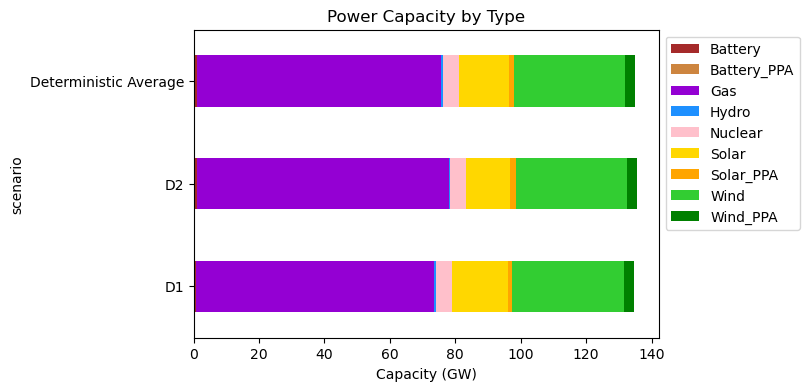

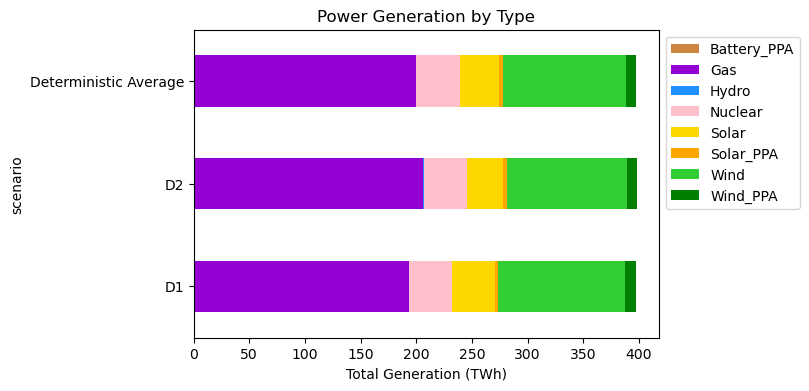

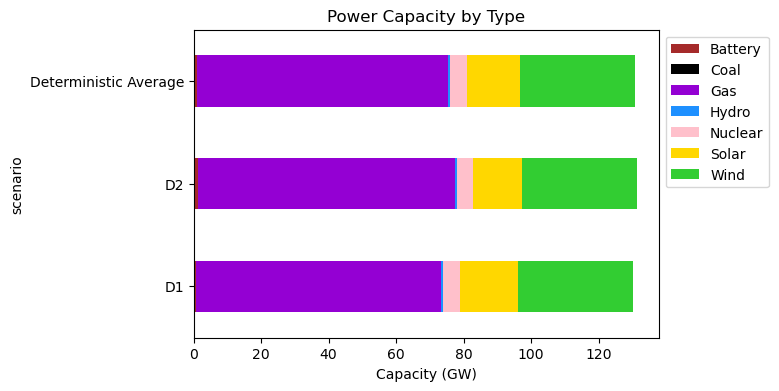

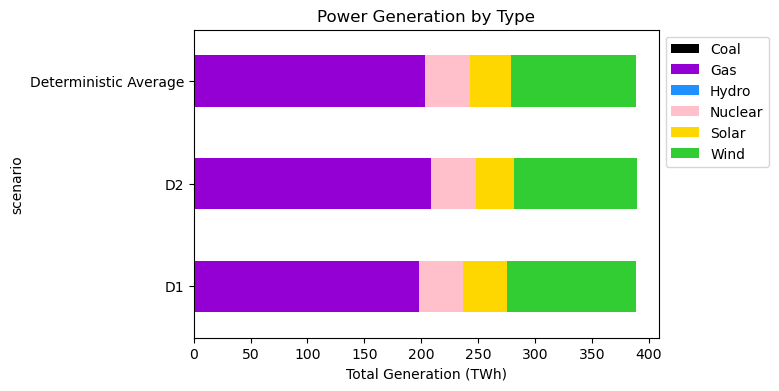

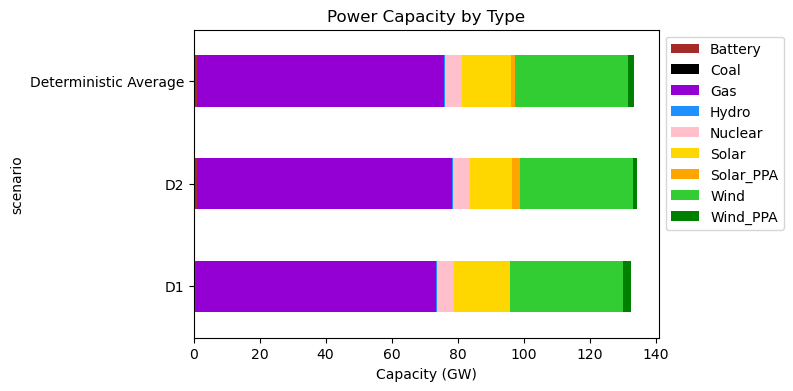

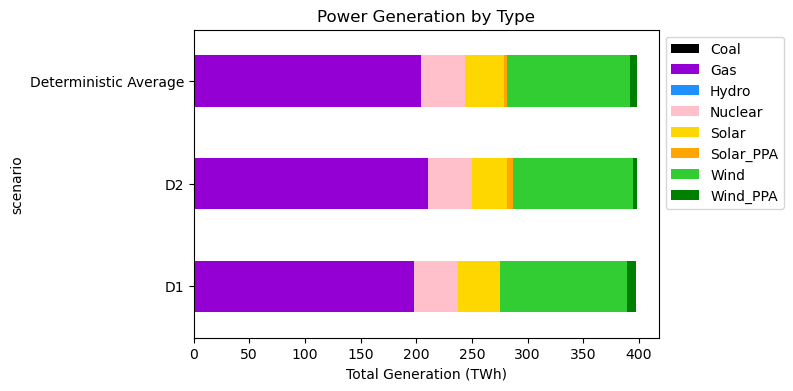

In [47]:
fig_comp_capacity(DATA_POWER_HOURLY[1], "Power Capacity by Type", 48.3, bat) #whats 48.3 hard coded here????
fig_comp_generation(DATA_POWER_HOURLY[0], "Power Generation by Type", False)

fig_comp_capacity(DATA_POWER_no_H2[1], "Power Capacity by Type", 48.3, bat) #whats 48.3 hard coded here????
fig_comp_generation(DATA_POWER_no_H2[0], "Power Generation by Type", False)

fig_comp_capacity(DATA_POWER_ANNUAL[1], "Power Capacity by Type", 48.3, bat) #whats 48.3 hard coded here????
fig_comp_generation(DATA_POWER_ANNUAL[0], "Power Generation by Type", False)

(-20.0, 20.0)

<Figure size 400x1000 with 0 Axes>

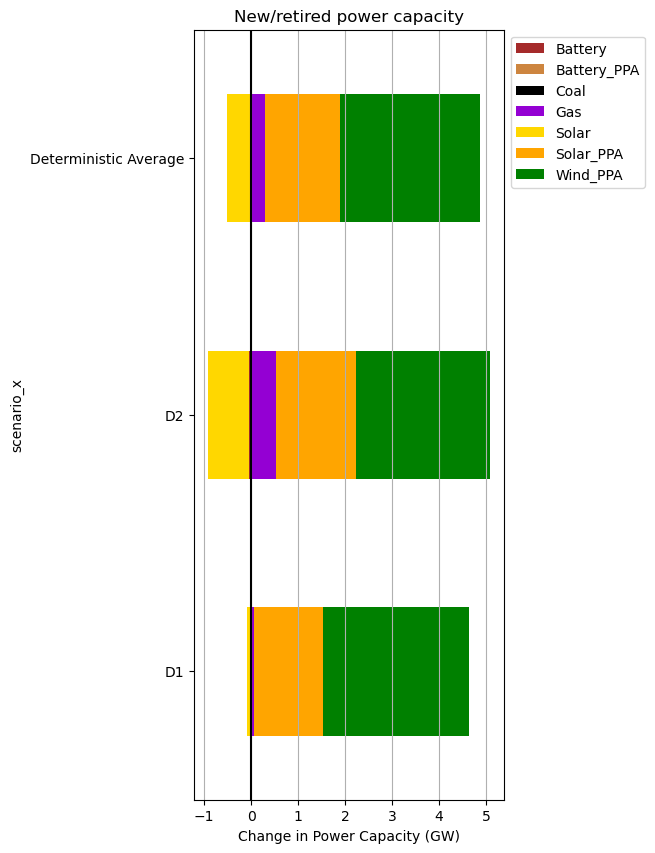

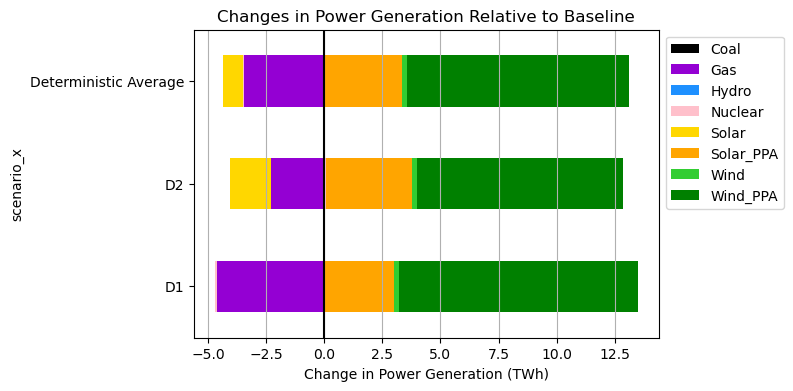

<Figure size 400x1000 with 0 Axes>

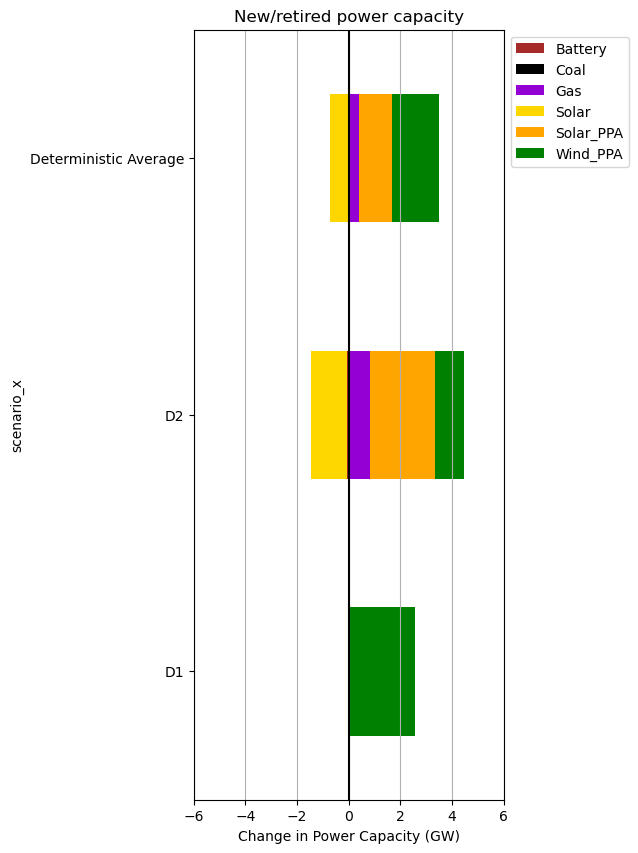

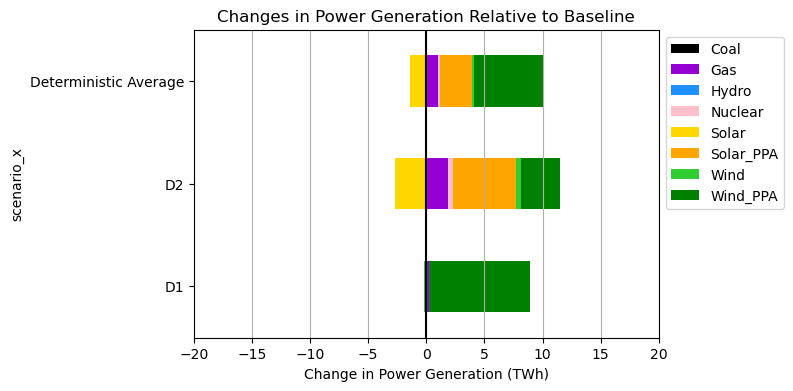

In [48]:
fig_comp_power_cap_to_base_updated(DATA_POWER_HOURLY[1], DATA_POWER_no_H2[1], "New/retired power capacity", bat)
fig_comp_power_gen_to_base_updated(DATA_POWER_HOURLY[0], DATA_POWER_no_H2[0], "Changes in Power Generation Relative to Baseline", False) #, [-0.3,0.2]

fig_comp_power_cap_to_base_updated(DATA_POWER_ANNUAL[1], DATA_POWER_no_H2[1], "New/retired power capacity", bat)
plt.xlim(-6,6)
fig_comp_power_gen_to_base_updated(DATA_POWER_ANNUAL[0], DATA_POWER_no_H2[0], "Changes in Power Generation Relative to Baseline", False) #, [-0.3,0.2
plt.xlim(-20,20)

In[76]:

In [49]:
# CHECK 1 or 2!!
h2_scenario_list_hourly = scenario_list_hourly
DATA_H2 = read_h2_data(h2_scenario_list_hourly, scenario_name_dict)

/var/folders/qb/cmll1b1n78x9rqnb7jky3n3w0000gn/T/ipykernel_34496/668082666.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h2_capacity_df.loc[h2_capacity_df["Resource"].str.contains("Electrolyzer"),"resource_type"] = " Electrolyzer"
/var/folders/qb/cmll1b1n78x9rqnb7jky3n3w0000gn/T/ipykernel_34496/668082666.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h2_capacity_df.loc[h2_capacity_df["Resource"].str.contains("Electrolyzer"),"resource_type"] = " Electrolyzer"


In [50]:
DATA_H2_Hourly = read_h2_data(h2_scenario_list_hourly, scenario_name_dict)

# Calculate the average values
average_h2_production_values = np.mean([df['h2_prod'] for df in DATA_H2_Hourly[0]], axis=0)
# average_generation_twh = np.mean([df['generation_twh'] for df in DATA_POWER_S2[0]], axis=0)

# Create the new DataFrame for the average scenario
average_h2_production_df_hourly = pd.DataFrame({
    'resource_type': DATA_H2_Hourly[0][0]['resource_type'],
    'h2_prod': average_h2_production_values,
    'scenario': 'Deterministic Average'
})

average_electrolyzer_cap_values = np.mean([df['EndCap'] for df in DATA_H2_Hourly[1]], axis=0)
# average_generation_twh = np.mean([df['generation_twh'] for df in DATA_POWER_S2[0]], axis=0)

# Create the new DataFrame for the average scenario
average_electrolyzer_cap_df_hourly = pd.DataFrame({
    'resource_type': DATA_H2_Hourly[1][0]['resource_type'],
    'EndCap': average_electrolyzer_cap_values,
    'scenario': 'Deterministic Average'
})

average_H2_storage_cap_values = np.mean([df['EndEnergyCap'] for df in DATA_H2_Hourly[2]], axis=0)
# average_generation_twh = np.mean([df['generation_twh'] for df in DATA_POWER_S2[0]], axis=0)

# Create the new DataFrame for the average scenario
average_H2_storage_cap_df_hourly = pd.DataFrame({
    'Resource': DATA_H2_Hourly[2][0]['Resource'],
    'EndEnergyCap': average_H2_storage_cap_values,
    'scenario': 'Deterministic Average'
})

/var/folders/qb/cmll1b1n78x9rqnb7jky3n3w0000gn/T/ipykernel_34496/668082666.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h2_capacity_df.loc[h2_capacity_df["Resource"].str.contains("Electrolyzer"),"resource_type"] = " Electrolyzer"
/var/folders/qb/cmll1b1n78x9rqnb7jky3n3w0000gn/T/ipykernel_34496/668082666.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h2_capacity_df.loc[h2_capacity_df["Resource"].str.contains("Electrolyzer"),"resource_type"] = " Electrolyzer"


In [51]:
h2_scenario_list_annual = scenarios_annual_avg_list
DATA_H2_Annual = read_h2_data(h2_scenario_list_annual, scenario_name_dict_annual)

# Calculate the average values
average_h2_production_values = np.mean([df['h2_prod'] for df in DATA_H2_Annual[0]], axis=0)
# average_generation_twh = np.mean([df['generation_twh'] for df in DATA_POWER_S2[0]], axis=0)

# Create the new DataFrame for the average scenario
average_h2_production_df_annual = pd.DataFrame({
    'resource_type': DATA_H2_Annual[0][0]['resource_type'],
    'h2_prod': average_h2_production_values,
    'scenario': 'Deterministic Average',
})

average_electrolyzer_cap_values = np.mean([df['EndCap'] for df in DATA_H2_Annual[1]], axis=0)
# average_generation_twh = np.mean([df['generation_twh'] for df in DATA_POWER_S2[0]], axis=0)

# Create the new DataFrame for the average scenario
average_electrolyzer_cap_df_annual = pd.DataFrame({
    'resource_type': DATA_H2_Annual[1][0]['resource_type'],
    'EndCap': average_electrolyzer_cap_values,
    'scenario': 'Deterministic Average'
})

average_H2_storage_cap_values = np.mean([df['EndEnergyCap'] for df in DATA_H2_Annual[2]], axis=0)
# average_generation_twh = np.mean([df['generation_twh'] for df in DATA_POWER_S2[0]], axis=0)

# Create the new DataFrame for the average scenario
average_H2_storage_cap_df_annual = pd.DataFrame({
    'Resource': DATA_H2_Annual[2][0]['Resource'],
    'EndEnergyCap': average_H2_storage_cap_values,
    'scenario': 'Deterministic Average'
})

NameError: name 'scenarios_annual_avg_list' is not defined

In [ ]:
DATA_H2 = list(DATA_H2).copy()
#DATA_H2[0].append(average_h2_production_df_annual)
DATA_H2[0].append(average_h2_production_df_hourly)
#DATA_H2[1].append(average_electrolyzer_cap_df_annual)
DATA_H2[1].append(average_electrolyzer_cap_df_hourly)
#DATA_H2[2].append(average_H2_storage_cap_df_annual)
DATA_H2[2].append(average_H2_storage_cap_df_hourly)

In [ ]:
dir_name = "Figures"

fig_comp_h2_prod(DATA_H2[0], "H2 Production by Type")
#fig_comp_h2_prod_to_base(DATA_H2_S2[0], "Changes in H2 Production Relative to Baseline" )
fig_comp_h2_cap(DATA_H2[1], "Electrolyzer Capacity")
plt.xlim(0,40)
#fig_comp_h2_cap_to_base(DATA_H2_S2[1], "Changes in H2 Capacity Relative to Baseline" )

fig_comp_h2_prod(DATA_H2_Hourly[0], "H2 Production by Type")
#fig_comp_h2_prod_to_base(DATA_H2_S2[0], "Changes in H2 Production Relative to Baseline" )
fig_comp_h2_cap(DATA_H2_Hourly[1], "H2 Production Capacity by Type")
#fig_comp_h2_cap_to_base(DATA_H2_S2[1], "Changes in H2 Capacity Relative to Baseline" )

In [ ]:
DATA_EMISSIONS = read_emission_data(scenario_list_hourly, scenario_name_dict)
DATA_EMISSIONS_ANNUAL_AVG = read_emission_data(scenario_list_annual, scenario_name_dict)
DATA_EMISSIONS_HOURLY_AVG = read_emission_data(scenario_list_hourly, scenario_name_dict)
DATA_EMISSIONS_no_H2_AVG = read_emission_data(scenario_list_no_H2, scenario_name_dict)

# Calculate the average values
average_emission_values = np.mean(DATA_EMISSIONS_HOURLY_AVG[0]['Power Plant Emissions'], axis=0)
average_h2_emission_values =  np.mean(DATA_EMISSIONS_HOURLY_AVG[0]['H2 Plant Emissions'], axis=0)

# Create the new DataFrame for the average scenario
average_emission_df_hourly = pd.Series({
    'scenario_name': 'Determinstic Average Hourly',
    'Power Plant Emissions': average_emission_values,
    'H2 Plant Emissions': average_h2_emission_values   
})

# Calculate the average values
average_emission_values = np.mean(DATA_EMISSIONS_no_H2_AVG[0]['Power Plant Emissions'], axis=0)
average_h2_emission_values =  np.mean(DATA_EMISSIONS_no_H2_AVG[0]['H2 Plant Emissions'], axis=0)

# Create the new DataFrame for the average scenario
average_emission_df_no_H2 = pd.Series({
    'scenario_name': 'Determinstic Average no H2',
    'Power Plant Emissions': average_emission_values,
    'H2 Plant Emissions': average_h2_emission_values   
})

DATA_EMISSIONS = list(DATA_EMISSIONS).copy()
#DATA_EMISSIONS[0] = pd.concat([DATA_EMISSIONS[0], pd.DataFrame(average_emission_df_annual).T])
DATA_EMISSIONS[0] = pd.concat([DATA_EMISSIONS[0], pd.DataFrame(average_emission_df_no_H2).T])
DATA_EMISSIONS[0].set_index('scenario_name', inplace=True)
DATA_EMISSIONS[0]["scenario_name"] = DATA_EMISSIONS[0].index


In [ ]:

# Calculate the average values
average_emission_values = np.mean(DATA_EMISSIONS_ANNUAL_AVG[0]['Power Plant Emissions'], axis=0)
average_h2_emission_values =  np.mean(DATA_EMISSIONS_ANNUAL_AVG[0]['H2 Plant Emissions'], axis=0)

# Create the new DataFrame for the average scenario
average_emission_df_annual = pd.Series({
    'scenario_name': 'Determinstic Average',
    'Power Plant Emissions': average_emission_values,
    'H2 Plant Emissions': average_h2_emission_values   
})


In [ ]:
DATA_EMISSIONS_HOURLY

In [ ]:
DATA_EMISSIONS_NO_H2 = read_emission_data(scenario_list_no_H2, scenario_name_dict)
DATA_EMISSIONS_HOURLY = read_emission_data(scenario_list_hourly, scenario_name_dict)

scenario_names_no_H2 = set(DATA_EMISSIONS_NO_H2[0]['scenario_name'])
scenario_names_hourly = set(DATA_EMISSIONS_HOURLY[0]['scenario_name'])
common_scenario_names = list(scenario_names_no_H2.intersection(scenario_names_hourly))
print(common_scenario_names)

scenario_diff_list = []
em_intens= pd.DataFrame()

for scenario in common_scenario_names:
    scenario_diff_list.append((DATA_EMISSIONS_HOURLY[0][DATA_EMISSIONS_HOURLY[0]['scenario_name'] == scenario]["Power Plant Emissions"] - DATA_EMISSIONS_NO_H2[0][DATA_EMISSIONS_NO_H2[0]['scenario_name'] == scenario]["Power Plant Emissions"] )*1000000/(161.3592*1000))

em_intens = pd.concat(scenario_diff_list, axis=1)
print(em_intens)
#em_intens= pd.DataFrame( (DATA_EMISSIONS_HOURLY[0]["Power Plant Emissions"] - DATA_EMISSIONS_NO_H2[0]["Power Plant Emissions"][:-1] )*1000000/(161.3592*1000))
# Calculate the average of rows starting with "D"
#average_row = em_intens[em_intens.index.str.startswith('D')].mean()

# Add the average row to the DataFrame
#em_intens.loc['Deterministic Average'] = average_row
# Sort the rows of em_intens into alphabetical order
em_intens = em_intens.sort_index()

em_intens.plot(kind = 'barh', color = ["aqua"], width = 0.5, ylabel = "CO2 Emissions (MTonnes)", xlabel = "Scenario")

plt.vlines(0.45,-1,11, linestyles = 'dashed', label = "PTC Tier 1 limit")
plt.vlines(1.5,-1,11, linestyles = 'dotted', label = "PTC Tier 2 limit")
plt.vlines(3,-1,11, label = "PTC Tier 4 limit")
plt.axvline(x=0, color='black', linestyle='-')
plt.grid(axis = 'x')
ax = plt.gca()
ax.set_xlabel("Emissions intensity (tons CO2eq/ton H2)")
#ax.set_xlim([xmin,xmax])
plt.xlim(-20,10)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2) #loc='lower left' #bbox_to_anchor=(1,1)

plt.savefig(dir_name + "/H2 Emissions Intensity.png", dpi=300, bbox_inches='tight')



In [ ]:
DATA_EMISSIONS_NO_H2

In [ ]:

########DO THE SAME FOR ANNUAL

DATA_EMISSIONS_ANNUAL = read_emission_data(s2_scenario_list_annual, scenario_name_dict_annual)

em_intens_annual= pd.DataFrame(  (DATA_EMISSIONS_ANNUAL[1]["Total_emissions"] - DATA_EMISSIONS_NO_H2[1]["Total_emissions"] )*1000000/(161.3592*1000))
# Calculate the average of rows starting with "D"
average_row = em_intens_annual[em_intens_annual.index.str.startswith('D')].mean()

# Add the average row to the DataFrame
em_intens_annual.loc['Deterministic Average'] = average_row
# Sort the rows of em_intens into alphabetical order
em_intens_annual = em_intens_annual.sort_index()


# Print the updated DataFrame
em_intens

em_intens_annual.plot(kind = 'barh', color = ["aqua"], width = 0.5, ylabel = "CO2 Emissions (MTonnes)", xlabel = "Scenario")

plt.vlines(0.45,-1,11, linestyles = 'dashed', label = "PTC Tier 1 limit")
plt.vlines(1.5,-1,11, linestyles = 'dotted', label = "PTC Tier 2 limit")
plt.vlines(3,-1,11, label = "PTC Tier 4 limit")
plt.axvline(x=0, color='black', linestyle='-')
plt.grid(axis = 'x')
ax = plt.gca()
ax.set_xlabel("Emissions intensity (tons CO2eq/ton H2)")
#ax.set_xlim([xmin,xmax])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2) #loc='lower left' #bbox_to_anchor=(1,1)

plt.savefig(dir_name + "/H2 Emissions Intensity.png", dpi=300, bbox_inches='tight')

In [ ]:
#print(DATA_EMISSIONS_ANNUAL[1])
print(DATA_EMISSIONS_HOURLY[1])
print(DATA_EMISSIONS_NO_H2[1])
DATA_EMISSIONS_HOURLY[1]["Total_emissions"] - DATA_EMISSIONS_NO_H2[1]["Total_emissions"]

In [ ]:
fig_emissions_breakdown(DATA_EMISSIONS[0], "CO2 Emissions Breakdown")
fig_emissions_breakdown_diff(DATA_EMISSIONS[0], "Changes in CO2 Emissions Relative to Baseline")

In [ ]:
DATA_EMISSIONS_S2_update = pd.concat(DATA_EMISSIONS, axis=1)
DATA_H2_S2_update = pd.concat(DATA_H2[0])

emissions_data = fig_h2_emissions_intensity(DATA_EMISSIONS_S2_update, DATA_H2_S2_update, 
                           "Consequential hydrogen emissions intensity", 4, xmin=-60, xmax=60)


In [ ]:
#DATA_EMISSIONS[0].rename(columns={'scenario_name)': 'scenario_name'}, inplace=True)
DATA_EMISSIONS[0].index.name = "index"


In [ ]:
power_df=pd.concat(DATA_POWER[0]).groupby('scenario', as_index=False).sum()
baseline_em_intens = DATA_EMISSIONS[0]['Power Plant Emissions'].iloc[0]*1000000/power_df['gen'].iloc[0]
fig_elec_emissions_intensity(DATA_EMISSIONS[0],DATA_POWER[0],"Power Emissions Intensity (Annual Average)",baseline_em_intens)

UPDATE X-LIMITS<br>
ig_h2_lcoh_system(DATA_COST_S2[0], DATA_COST_S2[1], DATA_H2_S2[0], DATA_POWER_S2[1], DATA_POWER_S2[2], emissions_data, 

In [ ]:
#DATA_COST_S2 = read_cost_data(s2_scenario_list[1:], scenario_name_dict)
#elec_sales = calculate_electricity_sales(s2_scenario_list[1:], scenario_name_dict)

#DATA_COST_ANNUAL = read_cost_data(scenarios_annual_avg_list, scenario_name_dict_annual)
#elec_sales_annual = calculate_electricity_sales(scenarios_annual_avg_list, scenario_name_dict_annual)

DATA_COST_HOURLY = read_cost_data(scenarios_hourly_avg_list, scenario_name_dict)
elec_sales_hourly = calculate_electricity_sales(scenarios_hourly_avg_list, scenario_name_dict)


In [ ]:
average_row_annual_0 = pd.DataFrame(DATA_COST_ANNUAL[0].iloc[:, 1:].mean()).T
average_row_annual_0['scenario_name'] = "average_of_annual_scenarios"
average_row_annual_0.set_index('scenario_name', inplace=True)
average_row_annual_0['scenario_name'] = "average_of_annual_scenarios"

average_row_annual_1 = pd.DataFrame(DATA_COST_ANNUAL[1].iloc[:, 1:].mean()).T
average_row_annual_1['scenario_name'] = "average_of_annual_scenarios"
average_row_annual_1.set_index('scenario_name', inplace=True)
average_row_annual_1['scenario_name'] = "average_of_annual_scenarios"


In [ ]:

average_row_hourly_0 = pd.DataFrame(DATA_COST_HOURLY[0].iloc[:, 1:].mean()).T
average_row_hourly_0['scenario_name'] = "average_of_hourly_scenarios"
average_row_hourly_0.set_index('scenario_name', inplace=True)
average_row_hourly_0['scenario_name'] = "average_of_hourly_scenarios"

average_row_hourly_1 = pd.DataFrame(DATA_COST_HOURLY[1].iloc[:, 1:].mean()).T
average_row_hourly_1['scenario_name'] = "average_of_hourly_scenarios"
average_row_hourly_1.set_index('scenario_name', inplace=True)
average_row_hourly_1['scenario_name'] = "average_of_hourly_scenarios"

#average_annual_elec_sales = np.mean([float(df['elec_sales']) for df in elec_sales_annual[0]])
average_hourly_elec_sales = np.mean([float(df['elec_sales']) for df in elec_sales_hourly[0]])

#average_hourly_elec_sales = np.mean(elec_sales_hourly[0]['elec_sales'])

# Create the new DataFrame for the average scenario
#elec_sales_annual_avg = pd.Series({
#    'scenario': 'average_of_annual_scenarios',
#    'elec_sales': average_annual_elec_sales  
#})

# Create the new DataFrame for the average scenario
elec_sales_hourly_avg = pd.Series({
    'scenario': 'average_of_hourly_scenarios',
    'elec_sales': average_hourly_elec_sales  
})

DATA_COST = list(DATA_COST_HOURLY).copy()
#DATA_COST[0] = pd.concat([DATA_COST_S2[0], average_row_annual_0])
#DATA_COST[1] = pd.concat([DATA_COST_S2[1], average_row_annual_1])
DATA_COST[0] = pd.concat([DATA_COST[0], average_row_hourly_0])
DATA_COST[1] = pd.concat([DATA_COST[1], average_row_hourly_1])

ELEC_SALES = list(elec_sales_hourly).copy()
#ELEC_SALES[0].append(pd.DataFrame(elec_sales_annual_avg).T)
ELEC_SALES[0].append(pd.DataFrame(elec_sales_hourly_avg).T)



In [ ]:
fig_h2_lcoh(DATA_COST[0], DATA_COST[1], DATA_H2[0], DATA_POWER[1], DATA_POWER[2], ELEC_SALES[0], emissions_data,'Levelized cost of hydrogen (LCOH)', xmin=-16,xmax=17) #8 or 10
fig_h2_lcoh(DATA_COST_HOURLY[0], DATA_COST_HOURLY[1], DATA_H2_Hourly[0], DATA_POWER_HOURLY_AVG[1], DATA_POWER_HOURLY_AVG[2], elec_sales_hourly[0], emissions_data,'Levelized cost of hydrogen (LCOH)', xmin=-16,xmax=17) #8 or 10

ig_cost_breakdown_diff(DATA_COST_S2[0], 'Difference in Annual System Cost')

In[258]:

BATTERY AND H2 STORAGE

In [ ]:
plt.rcParams['figure.dpi']=300

fig_comp_stor_h2_bat(DATA_POWER[2][1:], DATA_H2[2], DATA_H2[0])

#fig_comp_stor_h2_bat(DATA_POWER_HOURLY_AVG[2], DATA_H2_Hourly[2], DATA_H2_Hourly[0])

ELECTROLYZER CF

In [ ]:
fig_comp_EZ_CF(DATA_H2[0], DATA_H2[1], 'Electrolyzer Capacity Factor')

In [ ]:
def read_H2_system_power_flow(dir_list, scenario_name_dict):
    power_flows_df = []
    for dir_name in dir_list:
        TMR_df = pd.read_csv("./" + dir_name + "/Results/Results_HSC/HSC_TMR_balance_expanded.csv")[2:].reset_index()
        TMR_df['scenario_name'] = scenario_name_dict[dir_name]
        TMR_df['interval'] = range(len(TMR_df))

        curtail_df = pd.read_csv("./" + dir_name + "/Results/curtail.csv")[2:].reset_index()[['solar_photovoltaic_ppa', 'onshore_wind_turbine_ppa']]
        TMR_df['curtail_solar'] =  curtail_df['solar_photovoltaic_ppa']
        TMR_df['curtail_wind'] =  curtail_df['onshore_wind_turbine_ppa']

        solar_cap = float(pd.read_csv("./" + dir_name + "/Results/capacity.csv")['solar_photovoltaic_ppa'][4])
        wind_cap = float(pd.read_csv("./" + dir_name + "/Results/capacity.csv")['onshore_wind_turbine_ppa'][4])
        cf_df = pd.read_csv("./" + dir_name + "/Generators_variability.csv")[2:].reset_index()[['solar_photovoltaic_ppa', 'onshore_wind_turbine_ppa']]
        TMR_df['possible_solar'] = cf_df['solar_photovoltaic_ppa'].multiply(solar_cap)
        TMR_df['possible_wind'] = cf_df['onshore_wind_turbine_ppa'].multiply(wind_cap)

        power_df = pd.read_csv("./" + dir_name + "/Results/power.csv")[2:]
        charge_df = pd.read_csv("./" + dir_name + "/Results/charge.csv")[2:].reset_index()
        weights = pd.read_csv("./" + dir_name + "/Results/time_weights.csv")
        
        if 'no_H2' in dir_name:
            columns_to_filter = [x for x in ['onshore_wind_turbine_ppa', 'solar_photovoltaic_ppa'] if x in power_df.columns.tolist()]
            power_df = power_df.filter(items=columns_to_filter)
        #if 'Annual' in dir_name:
        else:
            charge_df = charge_df.rename(columns={'Battery_ppa':'Battery_ppa_charge'})
            charge_df['Battery_1_charge']=charge_df['Battery_ppa_charge']*-1
            power_df = power_df.merge(charge_df[['Resource','Battery_ppa_charge']], on='Resource')  
            columns_to_filter = [x for x in ['onshore_wind_turbine_ppa', 'solar_photovoltaic_ppa', 'Battery_ppa', 'Battery_ppa_charge'] if x in power_df.columns.tolist()]
            power_df = power_df.filter(items=columns_to_filter)
       # print(elec_sales.head)
        TMR_df['elec sales'] = power_df.sum(axis=1) 
                

        if 'no_H2' not in dir_name:
            electrolyzer_df = pd.read_csv("./" + dir_name + "/Results/Results_HSC/HSC_h2_generation_discharge.csv").drop([0,1]).reset_index(drop=True)
            # convert to electricity consumption
            electrolyzer_df['Electrolyzer_1.0'] = electrolyzer_df['Electrolyzer_1.0']*54.3
        TMR_df['elec purchases'] = electrolyzer_df['Electrolyzer_1.0']

        power_flows_df.append(TMR_df)
    
    return power_flows_df


In [ ]:
def read_storage_levels(dir_list, scenario_name_dict):
    bat_storage = []
    h2_storage = []
    for dir_name in dir_list:
        bat_stor_df = pd.DataFrame(pd.read_csv("./" + dir_name + "/Results/storage.csv")[2:].reset_index()['Battery_ppa'])
        bat_stor_df['scenario_name'] = scenario_name_dict[dir_name]
        bat_stor_df['interval'] = range(len(bat_stor_df))
        # Assuming bat_stor_df is the DataFrame you want to add the timestamp column to
        bat_stor_df['timestamp'] = pd.to_datetime(bat_stor_df['interval'], unit='h')
        
        
        bat_energy_cap = pd.read_csv("./" + dir_name + "/Results/capacity.csv")['Battery_ppa'][8]
        bat_stor_df['Bat_SOC'] = bat_stor_df['Battery_ppa'].divide(bat_energy_cap)

        h2_stor_df = pd.DataFrame(pd.read_csv("./" + dir_name + "/Results/Results_HSC/HSC_storage.csv")[2:].reset_index()['Gas_storage_tank_1.0'])
        h2_stor_df['scenario_name'] = scenario_name_dict[dir_name]
        h2_stor_df['interval'] = range(len(h2_stor_df))
        h2_stor_df['timestamp'] = pd.to_datetime(h2_stor_df['interval'], unit='h')

        h2_energy_cap = pd.read_csv("./" + dir_name + "/Results/Results_HSC/HSC_generation_storage_capacity.csv")['EndEnergyCap'][1]
        h2_stor_df['H2_SOC'] = h2_stor_df['Gas_storage_tank_1.0'].divide(h2_energy_cap)

        bat_storage.append(bat_stor_df)
        h2_storage.append(h2_stor_df)
    
    return bat_storage, h2_storage


In [ ]:
hourly_flows = read_H2_system_power_flow(scenarios_hourly_avg_list, scenario_name_dict_hourly)[1]
bat_SOC = read_storage_levels(scenarios_hourly_avg_list, scenario_name_dict_hourly)[0][1]
h2_SOC = read_storage_levels(scenarios_hourly_avg_list, scenario_name_dict_hourly)[1][1]

hourly_flows['hour'] = hourly_flows['interval'].mod(24)
hourly_flows["Bat_SOC"] = bat_SOC['Bat_SOC']
hourly_flows["H2_SOC"] = h2_SOC['H2_SOC']
hourly_flows['VRE_output'] = hourly_flows['solar_photovoltaic_ppa'] + hourly_flows['onshore_wind_turbine_ppa']
hourly_flows['storage_disch_mwh'] = hourly_flows['Storage Discharging'] * (1000/18.412) * -1
hourly_flows['storage_charg_mwh'] = hourly_flows['Storage Charging'] * (1000/18.412) * -1
hourly_flows['excess_elec_sales'] = (hourly_flows['elec sales'] - hourly_flows['solar_photovoltaic_ppa'] - hourly_flows['onshore_wind_turbine_ppa'] - hourly_flows['Battery_ppa.1']) 
hourly_sums = hourly_flows.groupby(['hour'], as_index=False).sum()[['onshore_wind_turbine_ppa',
       'solar_photovoltaic_ppa',  'Battery_ppa',
       'Electrolyzer_1.0', 'Battery_ppa.1', 'TMR_Slack', 'curtail_wind', 'curtail_solar', 'hour']]/365
hourly_sums['hour'] = range(24)

h2_sums = hourly_flows.groupby(['hour'], as_index=False).sum()[[
       'Electrolyzer_1.0', 'storage_disch_mwh', 'storage_charg_mwh', 'hour']]/365
SOC_hourly = hourly_flows.groupby(['hour'], as_index=False).sum()[["Bat_SOC", "H2_SOC", 'hour']]/365
SOC_hourly['hour'] = range(24)

# Plot the stacked bar chart
plt.rcParams['figure.dpi'] = 300
ax = hourly_sums.plot.bar(x='hour', stacked=True)
# Create a second y-axis
#ax2 = ax.twinx()

# Plot the bat_SOC_hourly["Bat_SOC"] on the second y-axis
SOC_hourly.plot(x = 'hour', y = 'Bat_SOC', color='black', linestyle='dotted', label='Battery SOC', ax = ax, secondary_y=True, x_compat=True, ylim = (0,1))
SOC_hourly.plot(x = 'hour', y = 'H2_SOC', color='blue', linestyle='dotted', label='H2 SOC', ax = ax, secondary_y=True, x_compat=True, ylim = (0,1))


# Set the labels and title for the first y-axis
ax.set_xlabel('Hour')
ax.set_ylabel('Sum')

# Decrease the size of the legend
ax.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

ax = h2_sums.plot.bar(x='hour', stacked=True)

# Set the labels and title
plt.xlabel('Hour')
plt.ylabel('Sum')

# Decrease the size of the legend
ax.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()



In [ ]:
excess_bat_sales = []
TMR_bat_sales = []
for t in range(len(hourly_flows)):
    if hourly_flows['onshore_wind_turbine_ppa'][t] + hourly_flows['solar_photovoltaic_ppa'][t] >= -1 * hourly_flows['Electrolyzer_1.0'][t]:
        excess_bat_sales.append(hourly_flows['Battery_ppa'][t])
        TMR_bat_sales.append(0)
    else: 
        excess_bat_sales.append(hourly_flows['Battery_ppa'][t] - (-1 * hourly_flows['Electrolyzer_1.0'][t] - hourly_flows[ 'onshore_wind_turbine_ppa'][t] - hourly_flows['solar_photovoltaic_ppa'][t]))
        TMR_bat_sales.append((-1 * hourly_flows['Electrolyzer_1.0'][t] - hourly_flows[ 'onshore_wind_turbine_ppa'][t] - hourly_flows['solar_photovoltaic_ppa'][t]))
        #excess_bat_sales(0)

print("Excess battery sales (not for PPA) (%): ", sum(excess_bat_sales)/ hourly_flows['Battery_ppa'].sum())
print("Bat for TMR (%) : ", sum(TMR_bat_sales)/ hourly_flows['Battery_ppa'].sum())
print("Excess battery sales (not for PPA) (MWh): ", sum(excess_bat_sales))
print("Bat for TMR (MWh): ", sum(TMR_bat_sales))

print("Possible Wind: ", hourly_flows["possible_wind"].sum())
print("Possible Solar: ", hourly_flows["possible_solar"].sum())

print("Produced Wind: ", hourly_flows['onshore_wind_turbine_ppa'].sum())
print("Produced Solar: ", hourly_flows['solar_photovoltaic_ppa'].sum())

print("Possible PPA VRE Production: ", hourly_flows["possible_wind"].sum() + hourly_flows["possible_solar"].sum())
print("Actual PPA VRE for TMR: ", (hourly_flows['onshore_wind_turbine_ppa'].sum() + hourly_flows['solar_photovoltaic_ppa'].sum()) * 5/6)
print("Posssible/Used VRE ratio: ", ( (hourly_flows['onshore_wind_turbine_ppa'].sum() + hourly_flows['solar_photovoltaic_ppa'].sum()) * 5/6)  / (hourly_flows["possible_wind"].sum() + hourly_flows["possible_solar"].sum()))



In [ ]:
h2_SOC.plot(x = 'timestamp', y = 'H2_SOC', color='blue', label='H2 SOC', secondary_y=True, x_compat=True, ylim = (0,1.2))
bat_SOC.plot(x = 'timestamp', y = 'Bat_SOC', color='black', label='Battery SOC', secondary_y=True, x_compat=True, ylim = (0,1.2))

In [ ]:
hourly_flows


In [ ]:
plt.hist(hourly_flows['VRE_output'], bins=range(0, int(max(hourly_flows['VRE_output'])) + 100, 25))
count = len(hourly_flows[hourly_flows['VRE_output'] <= 1076])
print(count)



In[84]:

NEW HOURLY ANNUAL DISPATCH COMPARED TO BASELINE

In [ ]:
cm = plt.get_cmap('Paired')
matplotlib.rcParams["axes.prop_cycle"] = cycler(color=[cm(v) for v in np.linspace(0, 1, 12)])

ef create_figs_power(dir_name):

In [ ]:
    
# resource_dict = {'C_biomass' : 'Biomass', 'C_conventional_hydroelectric' : 'Hydro', 
        #              'C_conventional_steam_coal' : 'Coal',
        #  'C_natural_gas_fired_combined_cycle' : 'Gas',
        # 'C_natural_gas_fired_combustion_turbine' : 'Gas',
        # 'C_natural_gas_steam_turbine' : 'Gas',
        #  'C_nuclear' :'Nuclear',
        # 'C_solar_photovoltaic' : 'Solar'}

resource_dict = {'biomass' : 'Biomass', 'conventional_hydroelectric' : 'Hydro', 'small_hydroelectric' : 'Hydro', <br>
                         'conventional_steam_coal' : 'Coal',<br>
             'natural_gas_fired_combined_cycle' : 'Gas',<br>
            'natural_gas_fired_combustion_turbine' : 'Gas',<br>
            'natural_gas_steam_turbine' : 'Gas',<br>
             'nuclear' :'Nuclear',<br>
             'solar_photovoltaic' : 'Solar', 'onshore_wind_turbine' : 'Wind'}

pathlib.Path("./" + dir_name + "/Figures").mkdir(parents=True, exist_ok=True)<br>
pathlib.Path("./" + dir_name + "/Figures/Gen Mix").mkdir(parents=True, exist_ok=True)<br>
pathlib.Path("./" + dir_name + "/Figures/Capacity").mkdir(parents=True, exist_ok=True)<br>
pathlib.Path("./" + dir_name + "/Figures/One Day Gen").mkdir(parents=True, exist_ok=True)

Define scenarios to compare against

In [ ]:
dir_name = "FRCC_2021_hourly_5GW_flex"
scenario_name = scenario_name_dict[dir_name]
baseline_dir ="FRCC_2021_Baseline"

In [ ]:
power_df = pd.read_csv(dir_name + "/Results/power.csv")  #.drop([0,1])
power_base = pd.read_csv(baseline_dir + "/Results/power.csv")  #.drop([0,1])

In [ ]:
power_long_df = power_df.melt(id_vars = "Resource").query("Resource != 'Zone' & Resource != 'AnnualSum'")
power_long_base = power_base.melt(id_vars = "Resource").query("Resource != 'Zone' & Resource != 'AnnualSum'")

In [ ]:
power_long_df = power_long_df.assign(resource_type = power_long_df["variable"].str.strip().str.replace('\_\d+', ''),
                                interval = pd.to_numeric(power_long_df["Resource"].str[1:])).replace({"resource_type": resource_dict})

In [ ]:
power_long_base = power_long_base.assign(resource_type = power_long_base["variable"].str.strip().str.replace('\_\d+', ''),
                                interval = pd.to_numeric(power_long_base["Resource"].str[1:])).replace({"resource_type": resource_dict})

In [ ]:
power_gen_df = power_long_df.query("variable != 'Total'").groupby(['resource_type','interval']).agg({'value': 'sum'}).reset_index()
power_gen_base = power_long_base.query("variable != 'Total'").groupby(['resource_type','interval']).agg({'value': 'sum'}).reset_index()

In [ ]:
gen_diff = power_gen_base.merge(power_gen_df, on=['interval','resource_type'], how='right')

Convert from MW to GW<br>
gen_diff["value_x"] = gen_diff['value_x'] * 0.001<br>
gen_diff["value_y"] = gen_diff['value_y'] * 0.001

en_diff['gen_diff'] = (gen_diff['value_y']-gen_diff['value_x'])

In [ ]:
gen_diff['hour'] = gen_diff['interval'].mod(24)
gen_diff = gen_diff.groupby(['hour', 'resource_type'], as_index=False).sum()
gen_diff['gen_diff'] = (gen_diff['value_y']-gen_diff['value_x'])

Showing hourly average generation by tech so dividing by 365

In [ ]:
gen_plot = gen_diff.pivot(index = 'hour', columns = 'resource_type')['value_y']/365
gen_plot_diff = gen_diff.pivot(index = 'hour', columns = 'resource_type')['gen_diff']/365
gen_plot_base = gen_diff.pivot(index = 'hour', columns = 'resource_type')['value_x']/365

if 'hourly' in dir_name: #bat<br>
    gen_plot = gen_plot[["Biomass", "Nuclear", "Hydro", "Coal", "Gas", "Solar", "Battery"]]<br>
    #gen_plot_diff = gen_plot_diff[["Biomass", "Nuclear", "Hydro", "Coal", "Gas", "Solar", "Battery"]] # "PHS", "battery", "Wind", "Gas w/ CCS" #"red", put at number 5<br>
    #gen_plot_base = gen_plot_diff[["Biomass", "Nuclear", "Hydro", "Coal", "Gas", "Solar", "Battery"]]<br>
elif 'ERCOT' in dir_name:<br>
    gen_plot = gen_plot[["Biomass", "Nuclear", "Hydro", "Coal", "Gas", "Solar", "Wind"]]<br>
    gen_plot_diff = gen_plot_diff[["Biomass", "Nuclear", "Hydro", "Coal", "Gas", "Solar", "Wind"]]<br>
    gen_plot_base = gen_plot_base[["Biomass", "Nuclear", "Hydro", "Coal", "Gas", "Solar", "Wind"]]<br>
else:<br>
    gen_plot = gen_plot[["Biomass", "Nuclear", "Hydro", "Coal", "Gas", "Solar"]]<br>
    gen_plot_diff = gen_plot_diff[["Biomass", "Nuclear", "Hydro", "Coal", "Gas", "Solar"]]<br>
    gen_plot_base = gen_plot_base[["Biomass", "Nuclear", "Hydro", "Coal", "Gas", "Solar"]]

################## Remove all columns with zero data

In [ ]:
gen_plot.fillna(0,inplace=True)
ColstoDrop = gen_plot.columns[(gen_plot == 0).all()].tolist()
    
# CREATE FIGURES
gen_plot.drop(ColstoDrop,axis=1).plot.area(xlabel = 'Hour', ylabel = 'Generation (MW)',
            title = 'Average hourly Power Dispatch for ' +scenario_name, 
            color = getColorbyGenType(gen_plot.drop(ColstoDrop,axis=1).columns.tolist())).legend(bbox_to_anchor= (1,1))
plt.legend(bbox_to_anchor= (1,1))
plt.savefig(dir_name + '/Annual_daily_dispatch.png')

########### Remove all columns with zero data

In [ ]:
gen_plot_base.fillna(0,inplace=True)
ColstoDrop = gen_plot_base.columns[(gen_plot_base == 0).all()].tolist()

In [ ]:
gen_plot_base.drop(ColstoDrop,axis=1).plot.area(xlabel = 'Hour', ylabel = 'Generation (MW)', 
        title = 'Average hourly Power Dispatch - Baseline',
        color =getColorbyGenType(gen_plot_base.drop(ColstoDrop,axis=1).columns.tolist())).legend(bbox_to_anchor= (1,1))
plt.legend(bbox_to_anchor= (1,1))
plt.savefig(baseline_dir + '/Baseline_annual_dispatch.png')

############Remove all columns with zero data

In [ ]:
gen_plot_diff.fillna(0,inplace=True)
ColstoDrop = gen_plot_diff.columns[(gen_plot_diff == 0).all()].tolist()

In [ ]:
gen_plot_diff.drop(ColstoDrop,axis=1).plot(kind = "bar", stacked = True, width=0.9, legend=True, xlabel = 'Hour',
   ylabel = "Generation (MW)", title = "Difference in average hourly power dispatch vs baseline " + scenario_name,
   color =getColorbyGenType(gen_plot_diff.drop(ColstoDrop,axis=1).columns.tolist())).legend(bbox_to_anchor= (1,1))
plt.legend(bbox_to_anchor= (1,1))
plt.axhline(y=0, color='black', linestyle='-')
plt.savefig(dir_name + '/Diff_annual_daily_dispatch-base.png', bbox_inches='tight')

In[257]:

In [ ]:
pd.concat(elec_sales[1])

In[260]:

SOLAR CF

In [ ]:
fig_comp_solar_CF(DATA_POWER_S2[0], DATA_POWER_S2[1], 'Renewables Capacity Factor')

In[261]:

In [ ]:
DATA_ATTREM_H2 = calculate_attributional_emissions(h2_scenario_list)

In [ ]:
fig_h2_attr_emissions(DATA_ATTREM_H2, DATA_H2_S2[0], "Hydrogen Attributional Emissions (Annual Matching)", 4)

In[209]:

In [ ]:
pd.concat(DATA_ATTREM_H2)

In[ ]: